In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/


# Overall Objectives
> What this project aims to achieve

This project was created as a submission for Theme 5 of the Nissan Summer Internship. Using the Medical Cost Personal Dataset from Kaggle, the goal is to predict individual medical expenses using machine learning regression methods (the specific types are not restricted). Additionally, the project aims to evaluate model performance based on various metrics and to reflect on the results.

Predicting medical expenses based on information such as a patient’s age, gender, region, and smoking status can be useful from a business perspective. For example, if smoking significantly increases medical costs, insurance companies might consider charging higher premiums to smokers. This can lead to valuable insights and business strategies.

In this project, the following points will be emphasized:

1. Evaluation of each model using MAE, RMSE, and R² metrics

    - Why is it important to evaluate models using multiple types of metrics?

2. Reasons for selecting specific regression methods

    - Brief explanation of each model (Linear Regression, Random Forest, XGBoost, LightGBM)
  
---
# プロジェクトの目標
> このプロジェクトで何がしたいのか


このプロジェクトは、日産のサマーインターンシップ「テーマ5」への提出を目的として作成されました。KaggleのMedical Cost Personal Datasetを活用し、機械学習による回帰手法（種類の指定なし）を用いて、個人の医療費を予測します。また、さまざまな指標を基にモデルの性能を評価し、その結果を考察することも目的としています。

患者の年齢、性別、地域、喫煙の有無などの情報をもとに医療費を予測することは、ビジネス的な観点から有用です。例えば、喫煙が医療費の増加に影響を与えるとすれば、保険会社が喫煙者に対してより高い保険料を設定するなど、さまざまなインサイトやビジネス戦略を導くことが可能になります。

本プロジェクトでは、以下の点に重点を置いて説明します：

1. MAE、RMSE、R²の評価指標を用いた各モデルの性能評価

    - なぜ複数の指標を用いてモデルを評価することが重要なのか？

2. 回帰手法の選定理由

    - 各モデルの簡単な説明（Linear Regression、Random Forest、XGBoost、LightGBM）

# Index

1. EDA
    - 1-1. Data Cleaning
    - 1-2. Statistics
    - 1-3. Data visualization 
2. Model Training and Evaluation
    - 2-1. Import Libraries
    - 2-2. Load data and split into Train/Test set
    - 2-3. Data Engineering
    - 2-4. Model training and Evaluation
    - 2-5. Hyperparameter Optimization for LightGBM
    - 2-6. Stacking
3. Summary
    - 3-1. Overall Results and Visualization
    - 3-2. Final Predictions vs Real Value Scatter

# 1. EDA

In [3]:
df = pd.read_csv('/kaggle/input/insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## 1-1. Cleaning the Data

The dataset consists of 7 columns, with the target variable being charges, representing the medical expenses. As a first step in the analysis, we will inspect the dataset for any missing values and examine the data types of each column to understand the overall structure.

--- 

このデータセットは7つの列で構成されており、予測すべきターゲット変数は「charges」、すなわち医療費です。分析の最初のステップとして、欠損値の有無と各列のデータ型を確認し、データの基本構造を把握します。

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Fortunately, there are no missing values in the dataset.

Based on our inspection, age, bmi, and children are numerical variables, while sex, smoker, and region are categorical.

Before training the model, we need to consider an appropriate preprocessing strategy. We will explore this in more detail in the preprocessing section. For now, let’s focus on exploring relationships between the variables to better understand the structure of the data.

---

幸いにも、このデータセットには欠損値が存在しません。

データ型の確認結果、age、bmi、children は数値型、sex、smoker、region はカテゴリ型であることが分かりました。

モデルの学習に入る前に、適切な前処理手法を検討する必要があります。前処理の詳細については後ほどのセクションで扱う予定です。まずは各変数間の関係性を把握し、データの構造を理解することに集中しましょう。

## 1-2. Statistics

In [6]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Examining the distribution of the age variable, the youngest individual is 14 years old and the oldest is 64, with an average age of approximately 39.

For BMI, the average value is 30, with the lowest observed at 15 and the highest at 53.

Regarding the children variable, individuals typically have one child on average.

Next, we will visualize the distribution of these variables to gain a more intuitive understanding of the dataset.

---

まず、age（年齢）の分布を確認すると、最も若いサンプルは14歳、最年長は64歳であり、平均年齢は約39歳です。

BMI（体格指数）は平均30で、最小値は15、最大値は53となっています。

children（子供の数）に関しては、平均して1人の子供がいるサンプルが多いことが分かります。

それでは、これらの変数の分布を視覚化して、データの特徴をより直感的に理解していきましょう。


## 1-3. Data Visualization

In [7]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from warnings import simplefilter

simplefilter('ignore')
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = (4,5)

<Axes: >

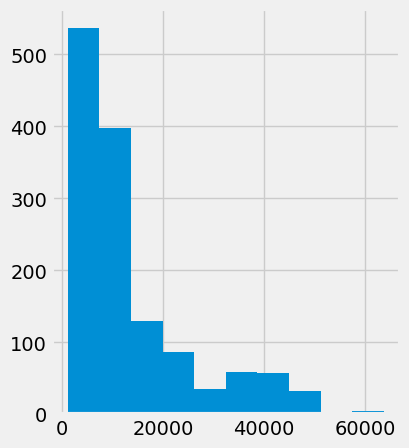

In [8]:
df.charges.hist()

The distribution of charges (medical expenses) follows a classic power-law distribution. As indicated in the summary statistics above, the mean is notably higher than the median, suggesting that the average is significantly skewed by a small number of high-cost outliers. Most individuals paid less than 10,000, and 50% of the data falls below 9,382.03.

In cases like this, where the distribution is heavily skewed, linear regression models tend to perform poorly on lower values. To mitigate this, a common approach is to apply a logarithmic transformation to normalize the distribution.

Accordingly, we will apply the np.log1p() function to the charges variable in the modeling phase, aiming to improve performance by approximating a normal distribution.

---

charges（医療費）の分布を確認すると、典型的な冪分布（パワーロー分布）に従っていることが分かります。上部の統計情報からも分かるように、平均値は中央値より右側（より大きい値）に位置しており、これは一部の外れ値が平均に大きな影響を与えていることを意味します。多くのサンプルでは10,000未満の費用が支払われており、全体の50%は9,382.03以下となっています。

このような非対称分布では、線形回帰モデルは小さい値の予測精度が低下しやすい傾向があります。そのため、対数変換を行い、分布を正規化してからモデルを学習させる手法が一般的に用いられます。

今後のモデル学習の段階では、charges変数に np.log1p() 関数を適用し、正規分布に近づけた状態で回帰モデルの学習を行う予定です。

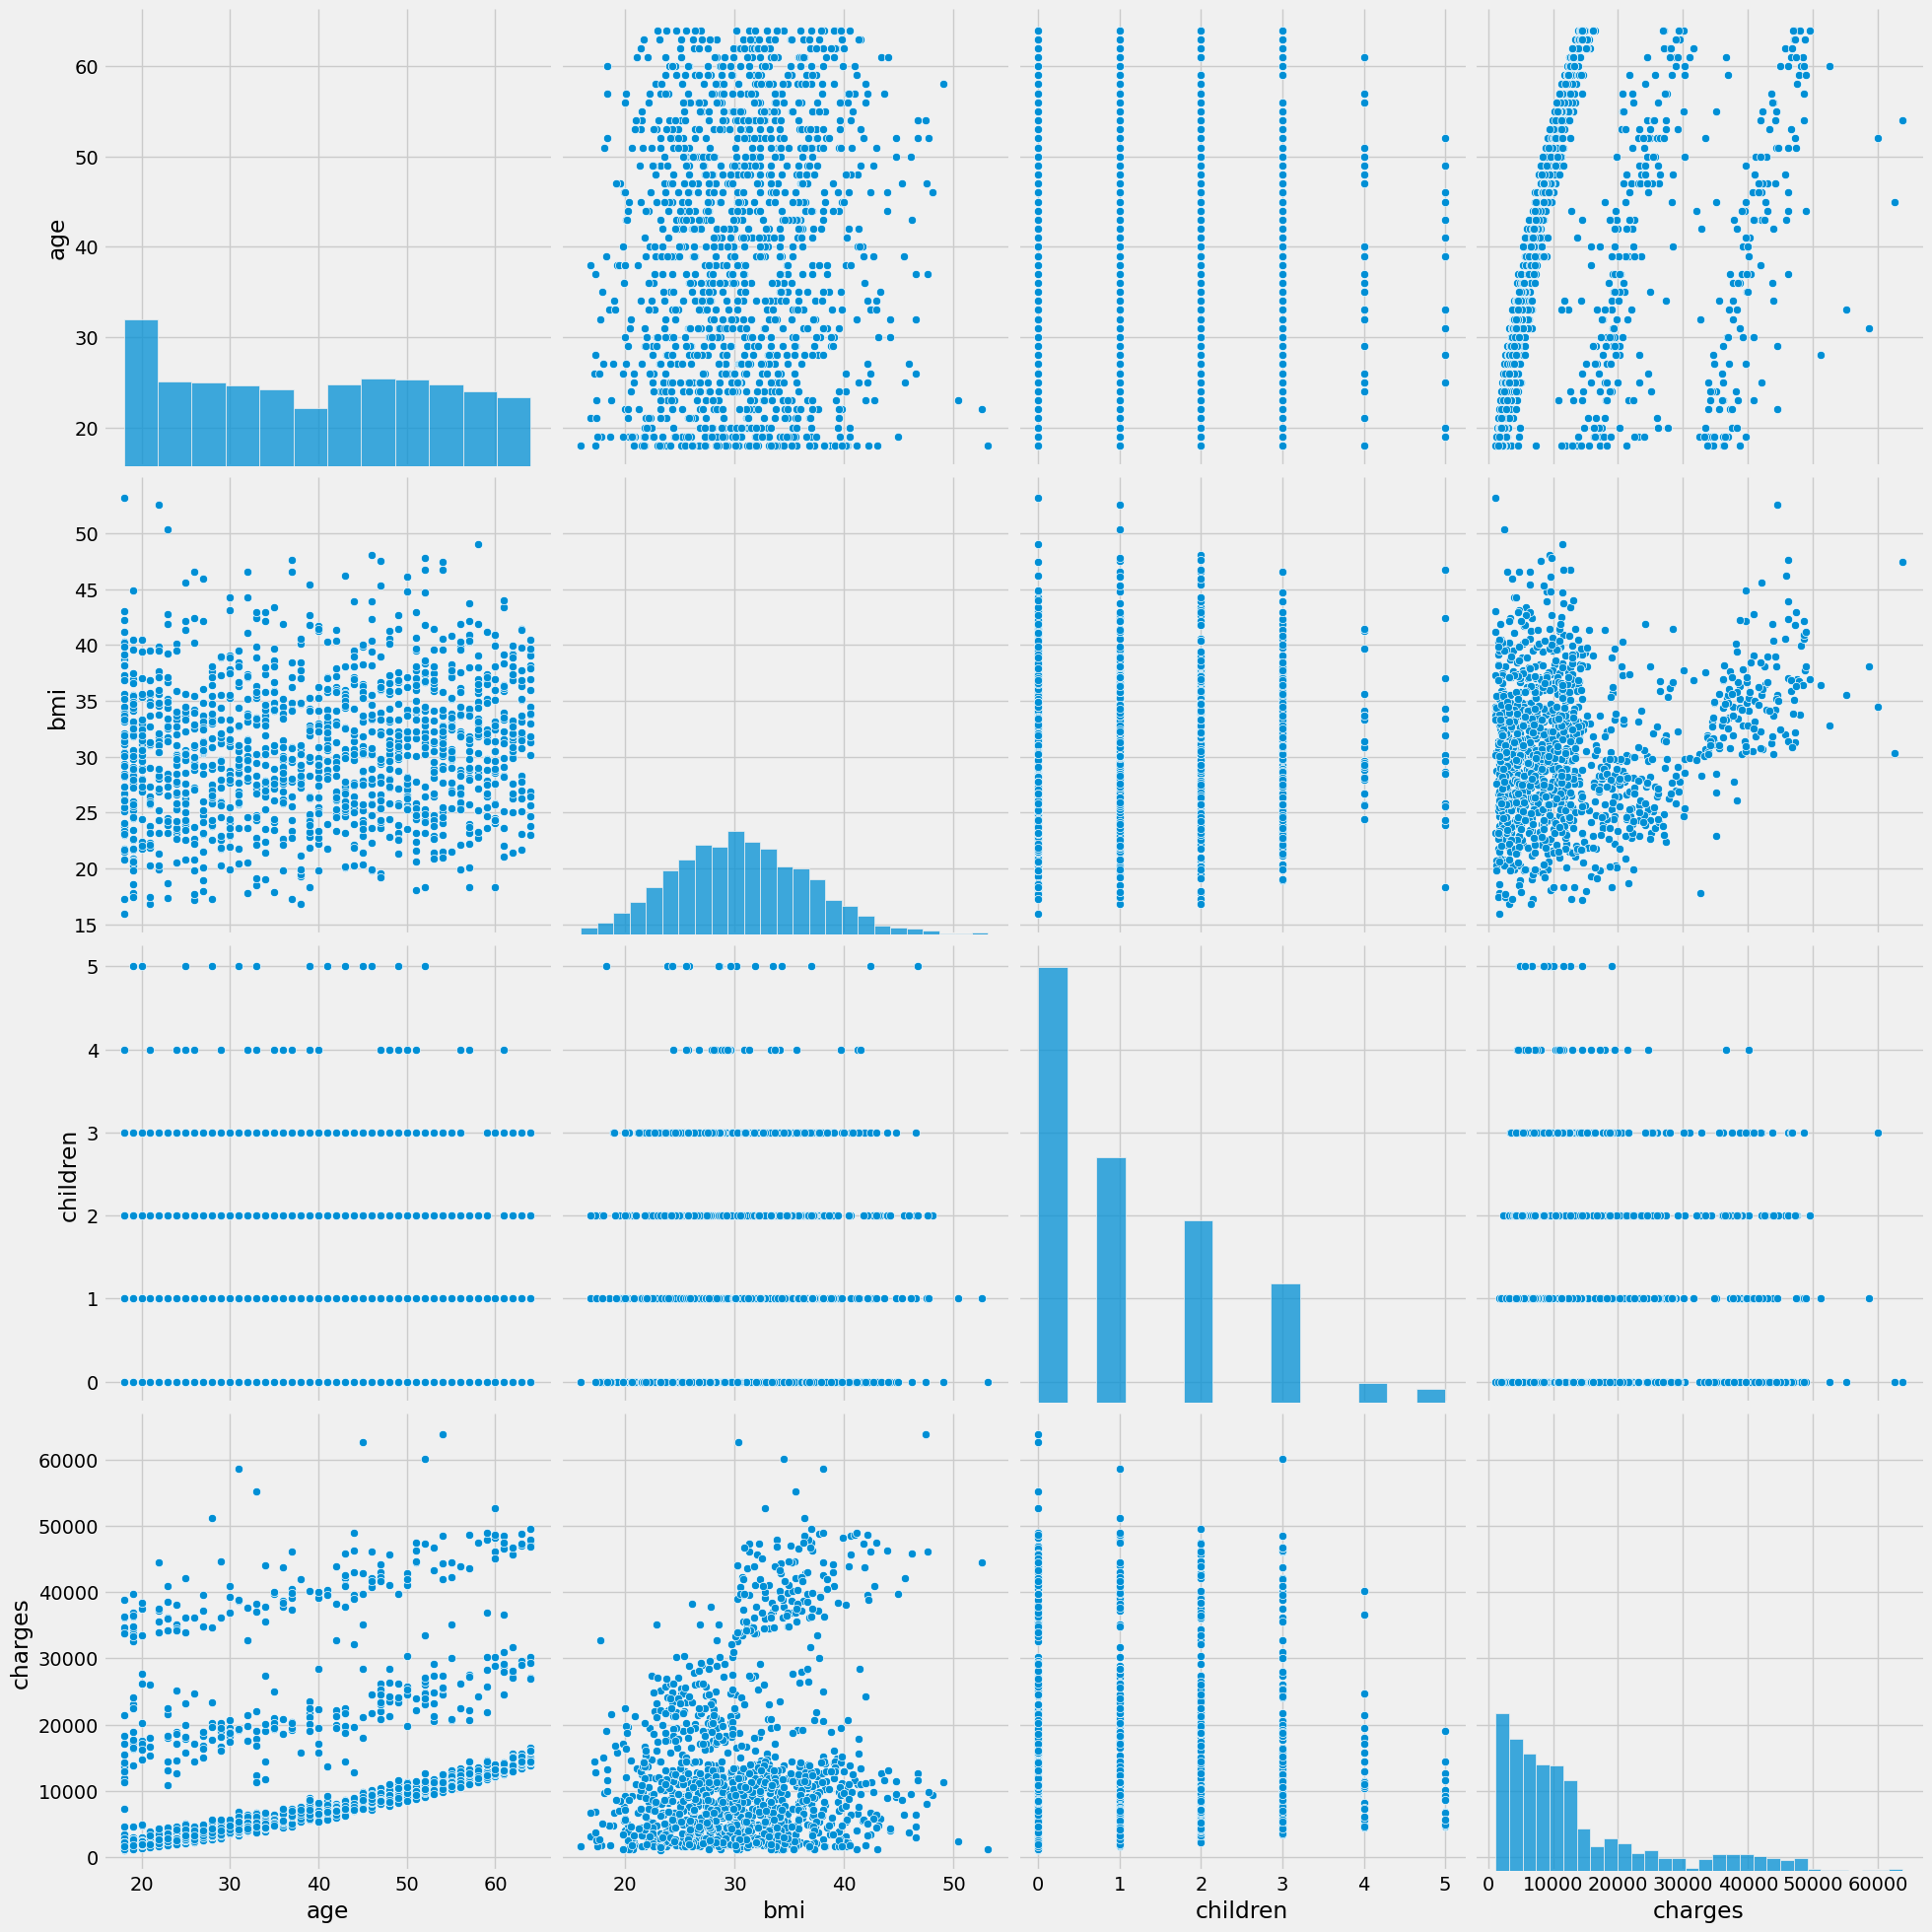

In [9]:
sns.pairplot(data= df, size = 5)

Analyzing the distributions of the numerical variables, we observe that BMI follows a roughly normal distribution, while both children and charges exhibit characteristics of a power-law distribution.

There is a clear positive linear relationship between age and charges. Interestingly, the data appears to cluster into three distinct upward-sloping lines, suggesting the existence of subgroups based on cost brackets.

Examining the relationship between BMI and charges, we find that most high-cost individuals have a BMI above 30, indicating a potential link between obesity and medical expenses.

For the children variable, it appears that individuals with four or more children tend to incur lower medical costs on average.

Based on these initial observations, we will now perform a more detailed correlation analysis among the variables.

---

数値型変数の分布を確認したところ、BMI は比較的正規分布に近い形を示しました。一方、children と charges は **冪分布（パワーロー分布）**の傾向を持っていることが分かります。

age と charges には明確な正の線形関係が見られ、さらに興味深いことに、データは3つの異なる直線的なグループに分かれているように見えます。これは費用帯によって患者群が分かれている可能性を示唆します。

BMI と charges の関係を見ると、高額な医療費を支払っている個人の多くがBMI30以上であることが分かり、肥満と医療費との関連性を示唆しています。

children に関しては、4人以上の子供を持つサンプルでは、平均的に医療費が低い傾向が見られます。

これらの初期観察を踏まえ、変数間の相関関係をさらに詳しく分析していきます。

In [10]:
num_cols = df.select_dtypes(include=np.number)
num_cols.corr().style.background_gradient()

In this section, we will analyze both the distribution of categorical variables and their relationship with charges (medical expenses). By visualizing the characteristics of each category and comparing group-level differences, we aim to explore the impact of categorical features on the target variable.

---

ここでは、カテゴリ変数が charges（医療費）に与える影響の関係性を分析します。各カテゴリの特徴とグループ間の費用差を視覚化することで、カテゴリ変数とターゲット変数との関連性を探っていきます。

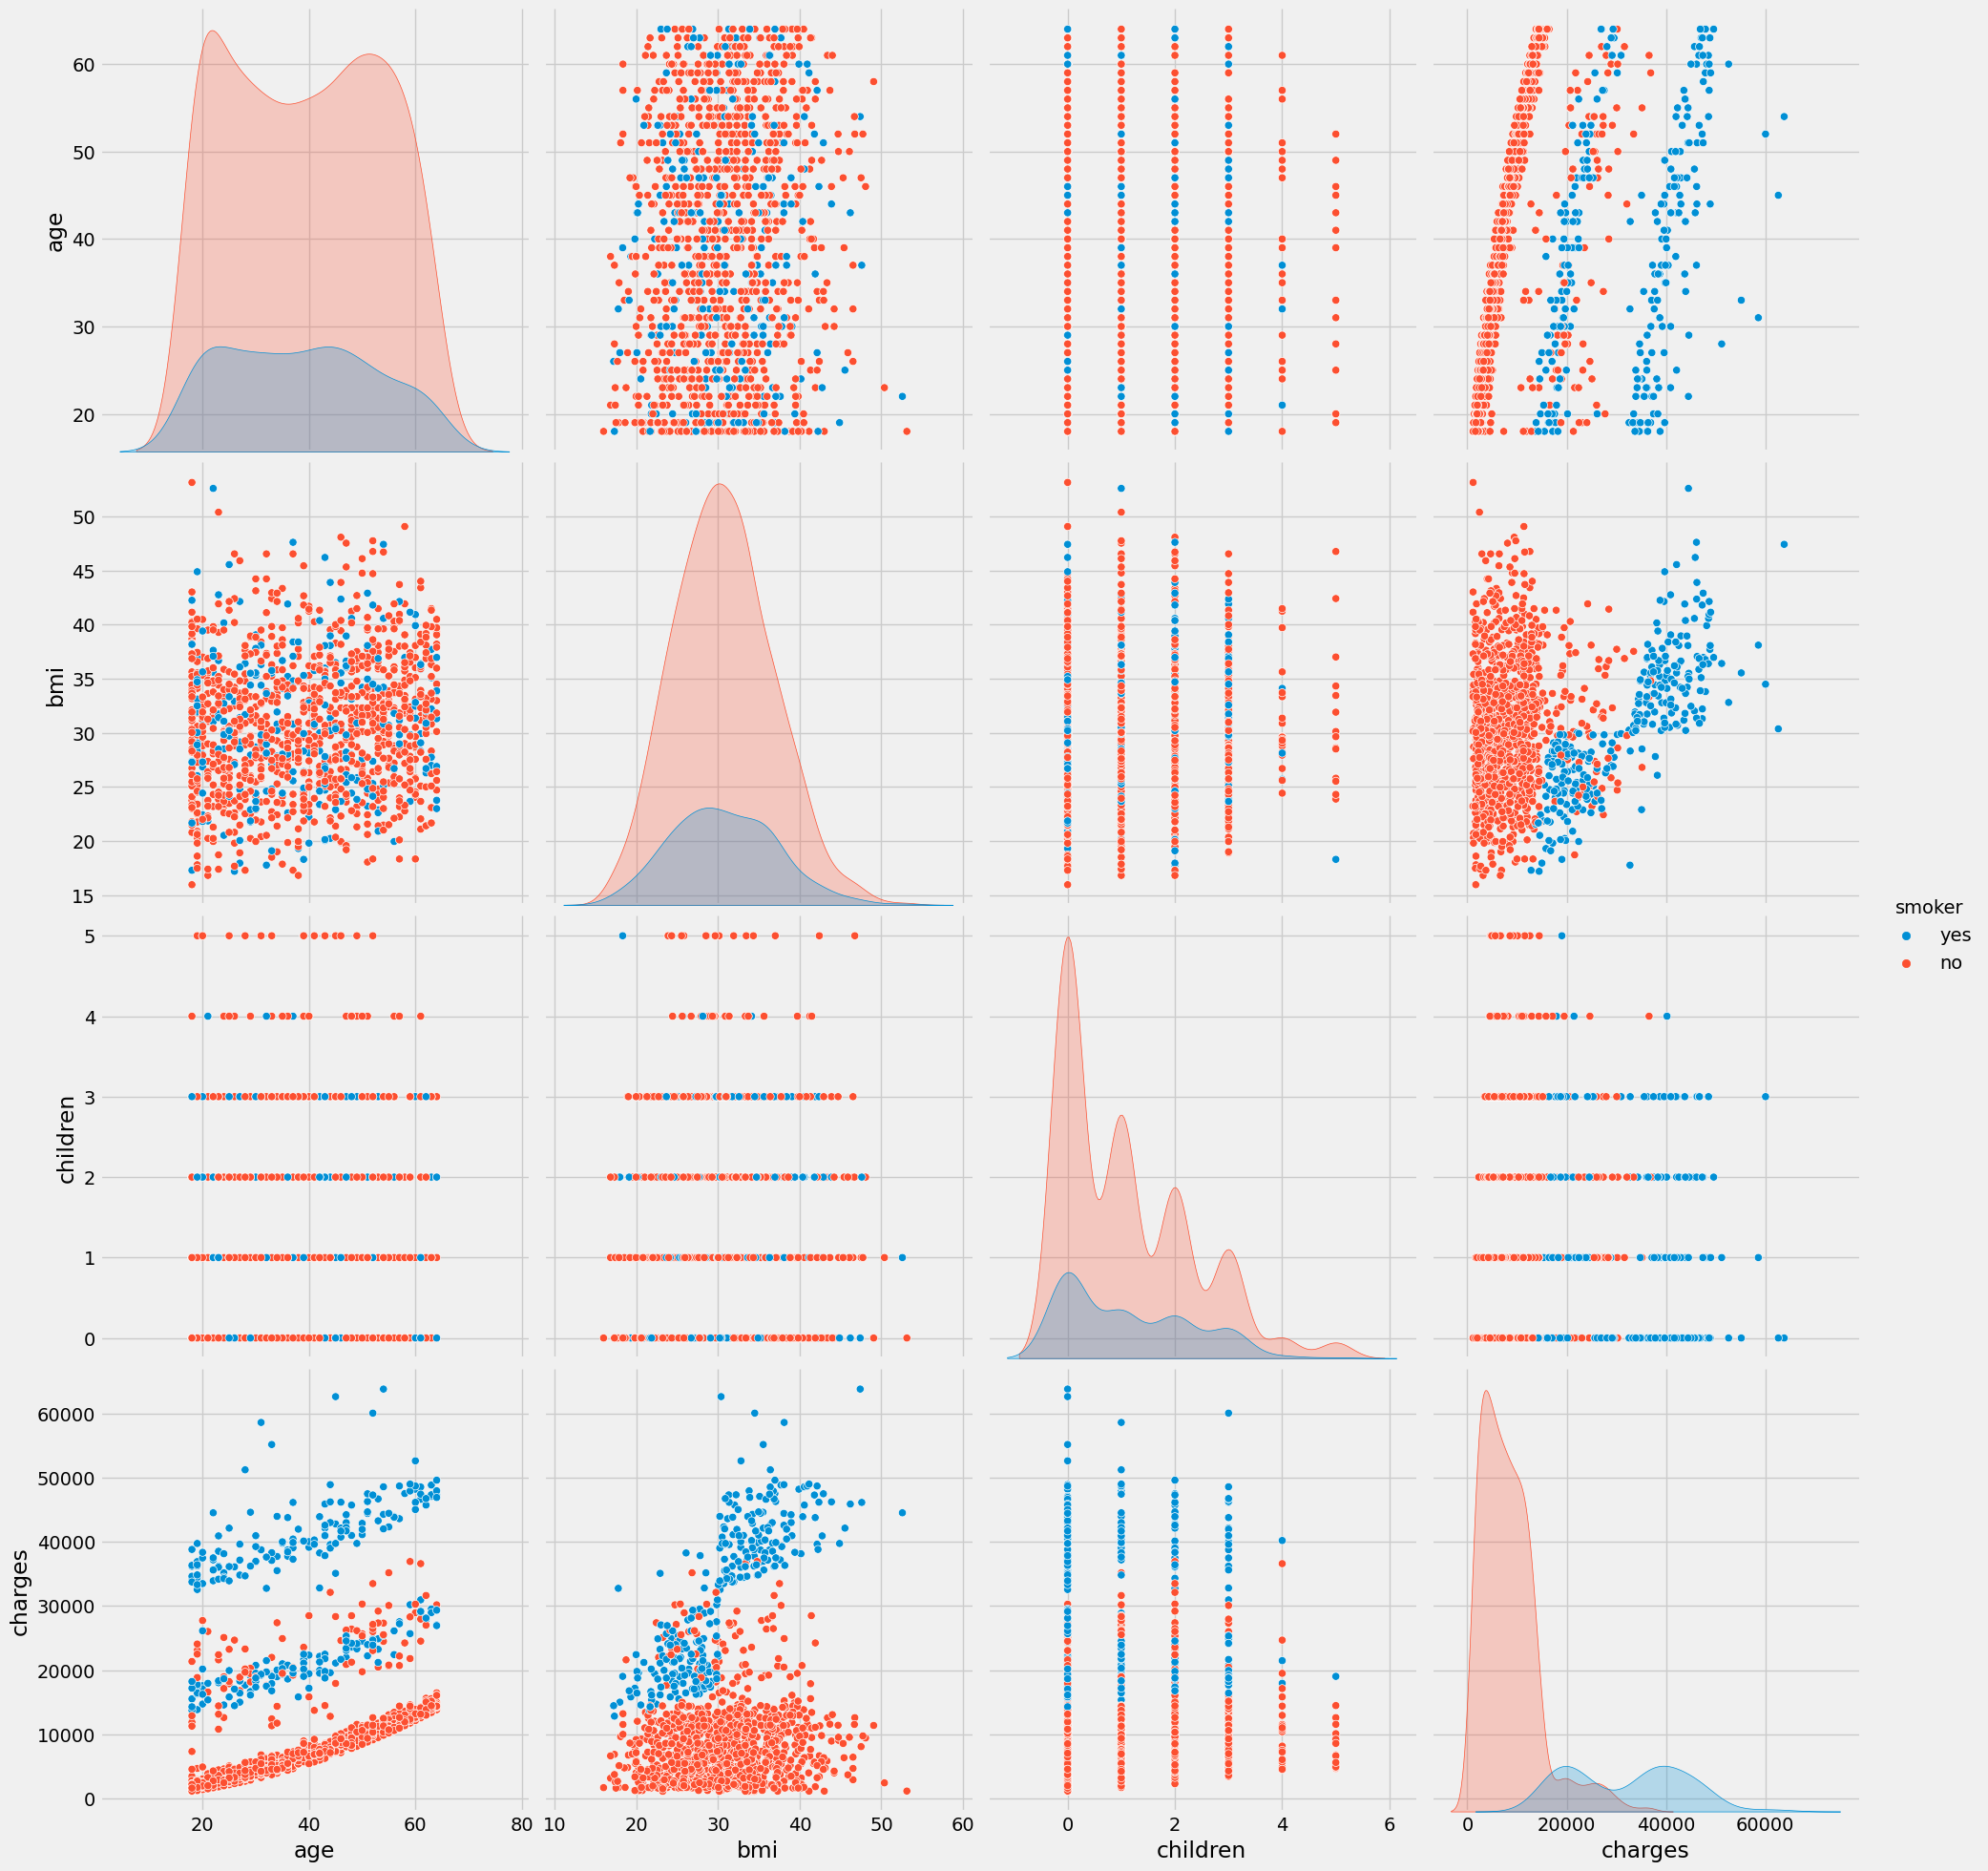

In [11]:
sns.pairplot(data= df, size = 5, hue = 'smoker')

In the visualization, blue represents smokers, while orange represents non-smokers. The distributions of medical charges differ significantly between the two groups, with smokers generally incurring higher and more variable costs.

This suggests that smoking status has a substantial impact on medical expenses, and the smoker variable is likely to be a strong predictor in the modeling phase.

---

可視化された分布において、青色色は喫煙者、オレンジ色は非喫煙者を示しています。両グループの費用分布には明確な違いが見られ、特に喫煙者は全体的に費用が高く、分散も大きい傾向があります。

この結果から、喫煙の有無が医療費に大きな影響を与えていることが分かり、smoker 変数は予測モデルにおいて重要な説明変数となる可能性が高いと考えられます。

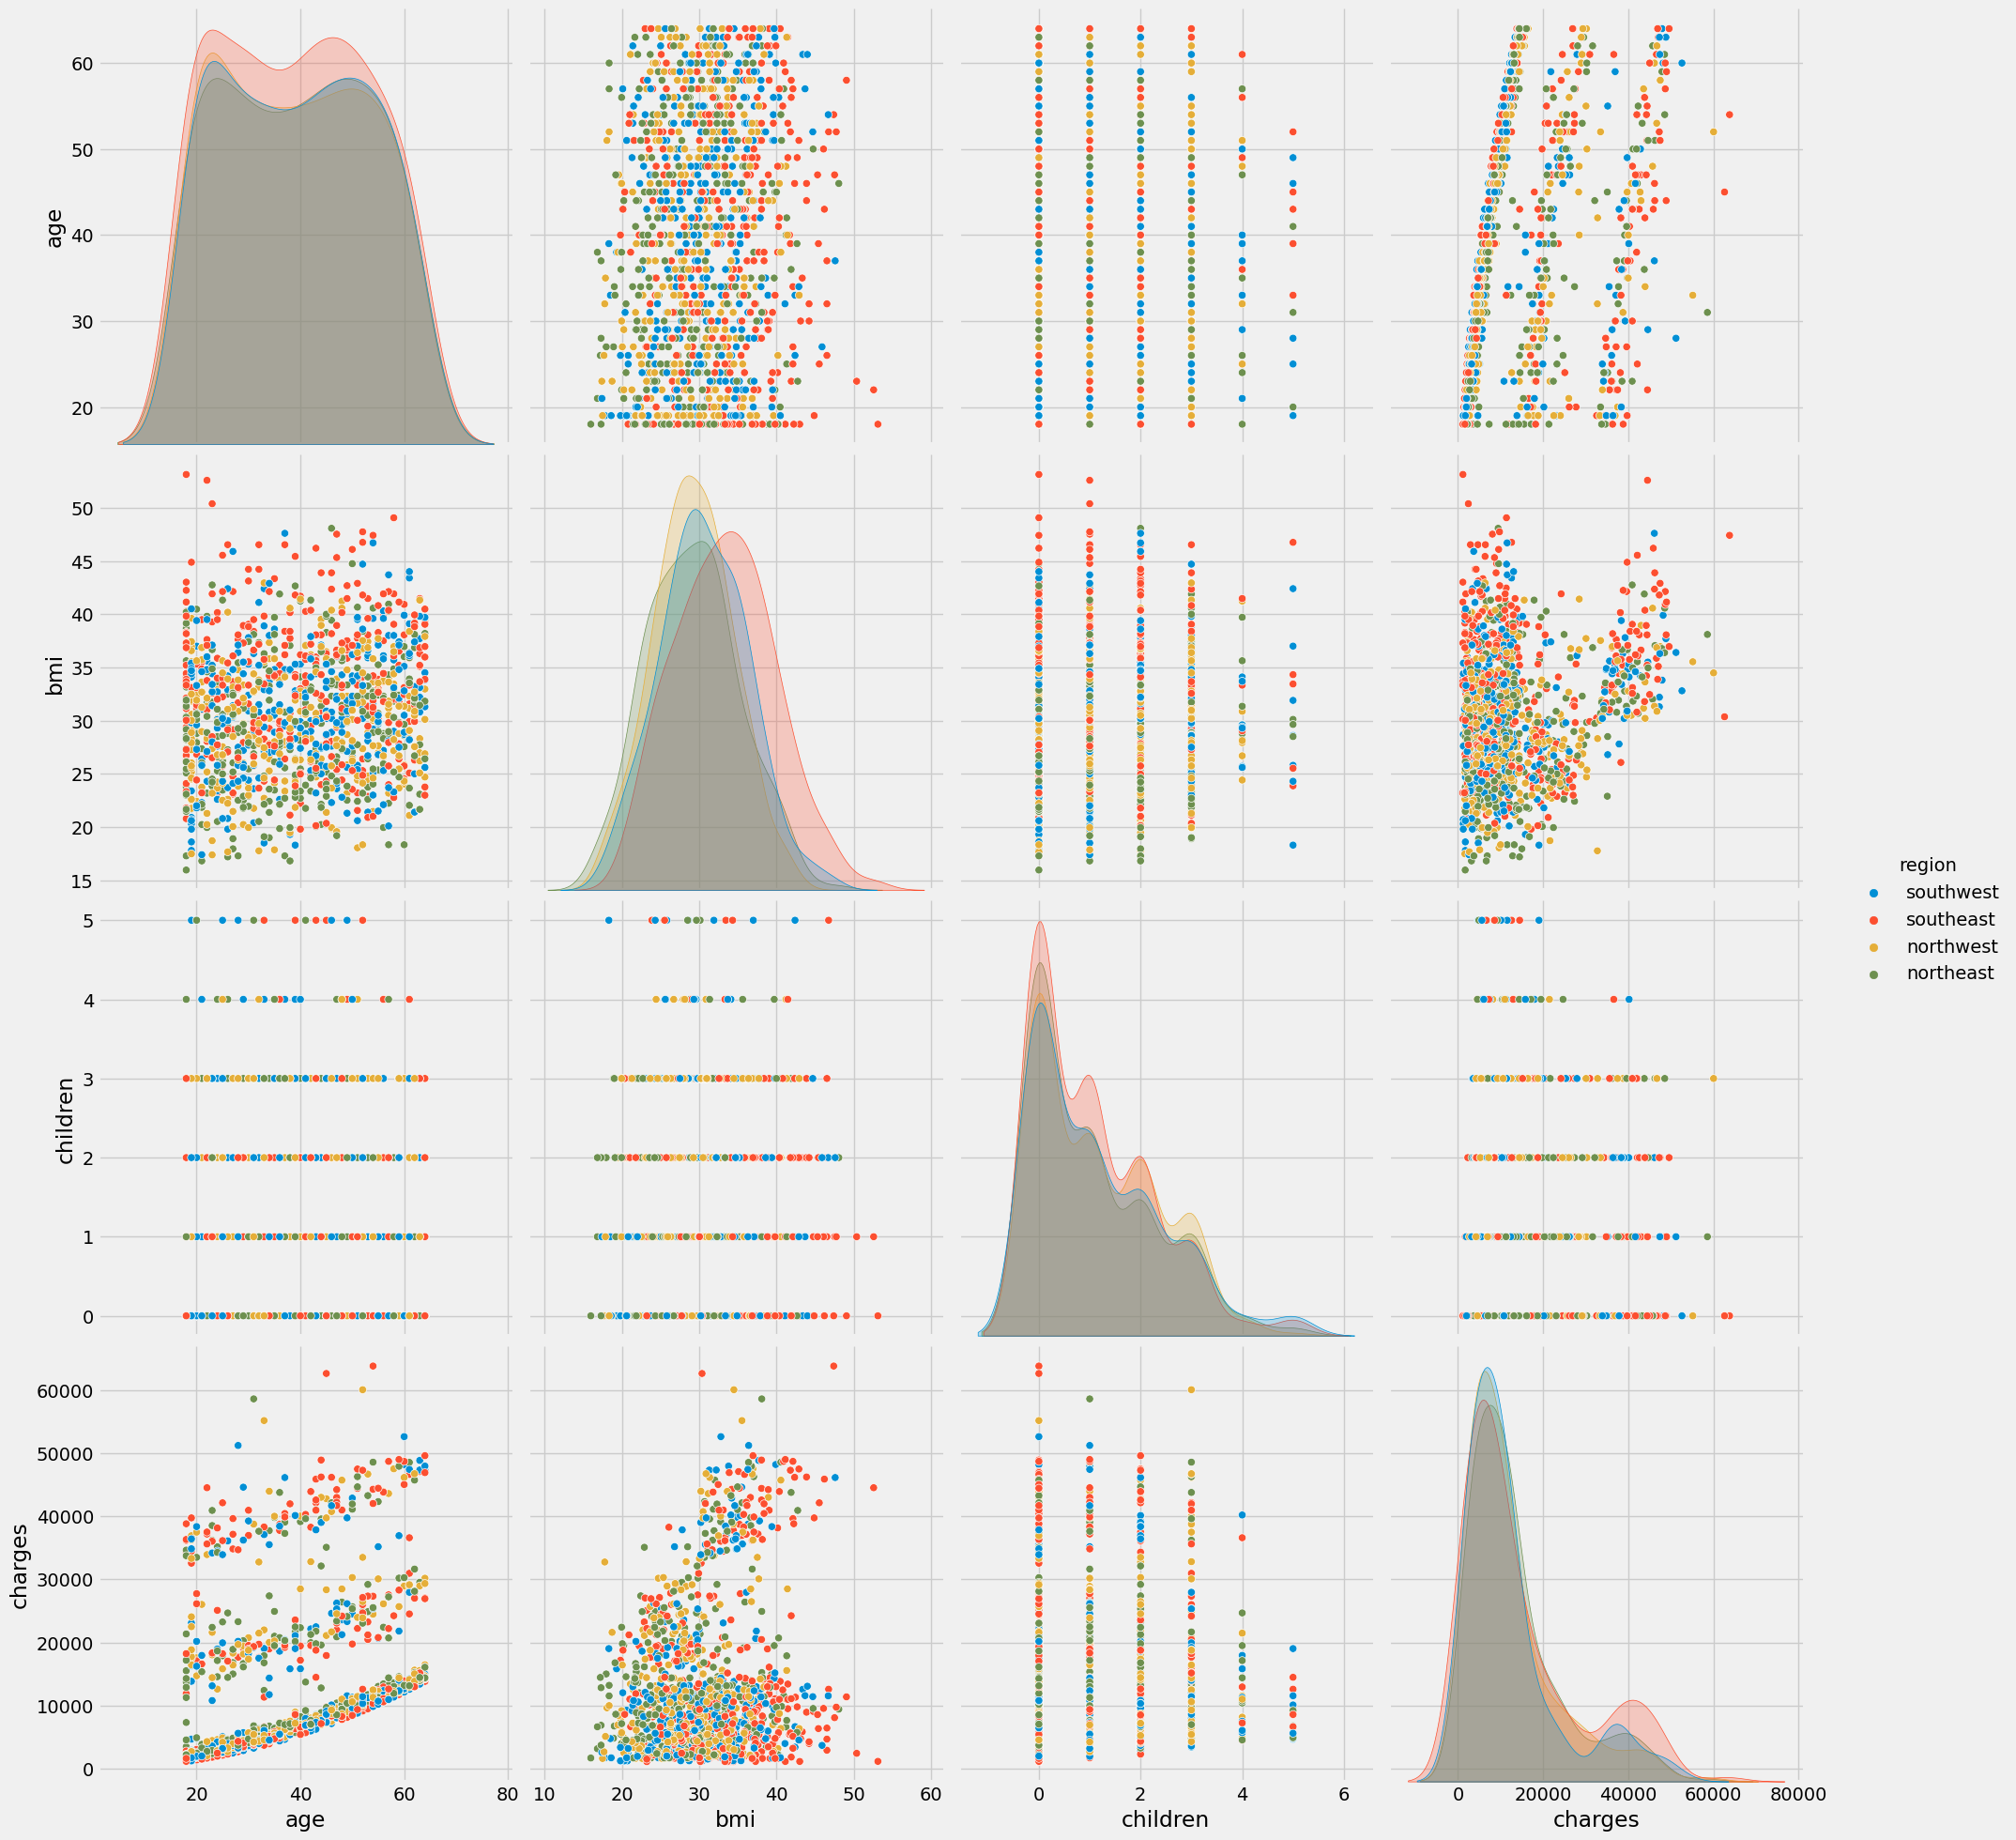

In [12]:
sns.pairplot(data= df, size = 5, hue = 'region')

Overall, it looks similar, but in a perspective of BMI, it seems like they have different BMI distribution depending on the regions. 

---

全体的には、あまり変わらないですが、地域によって、BMIの分布がちょっと違うのように見えます。

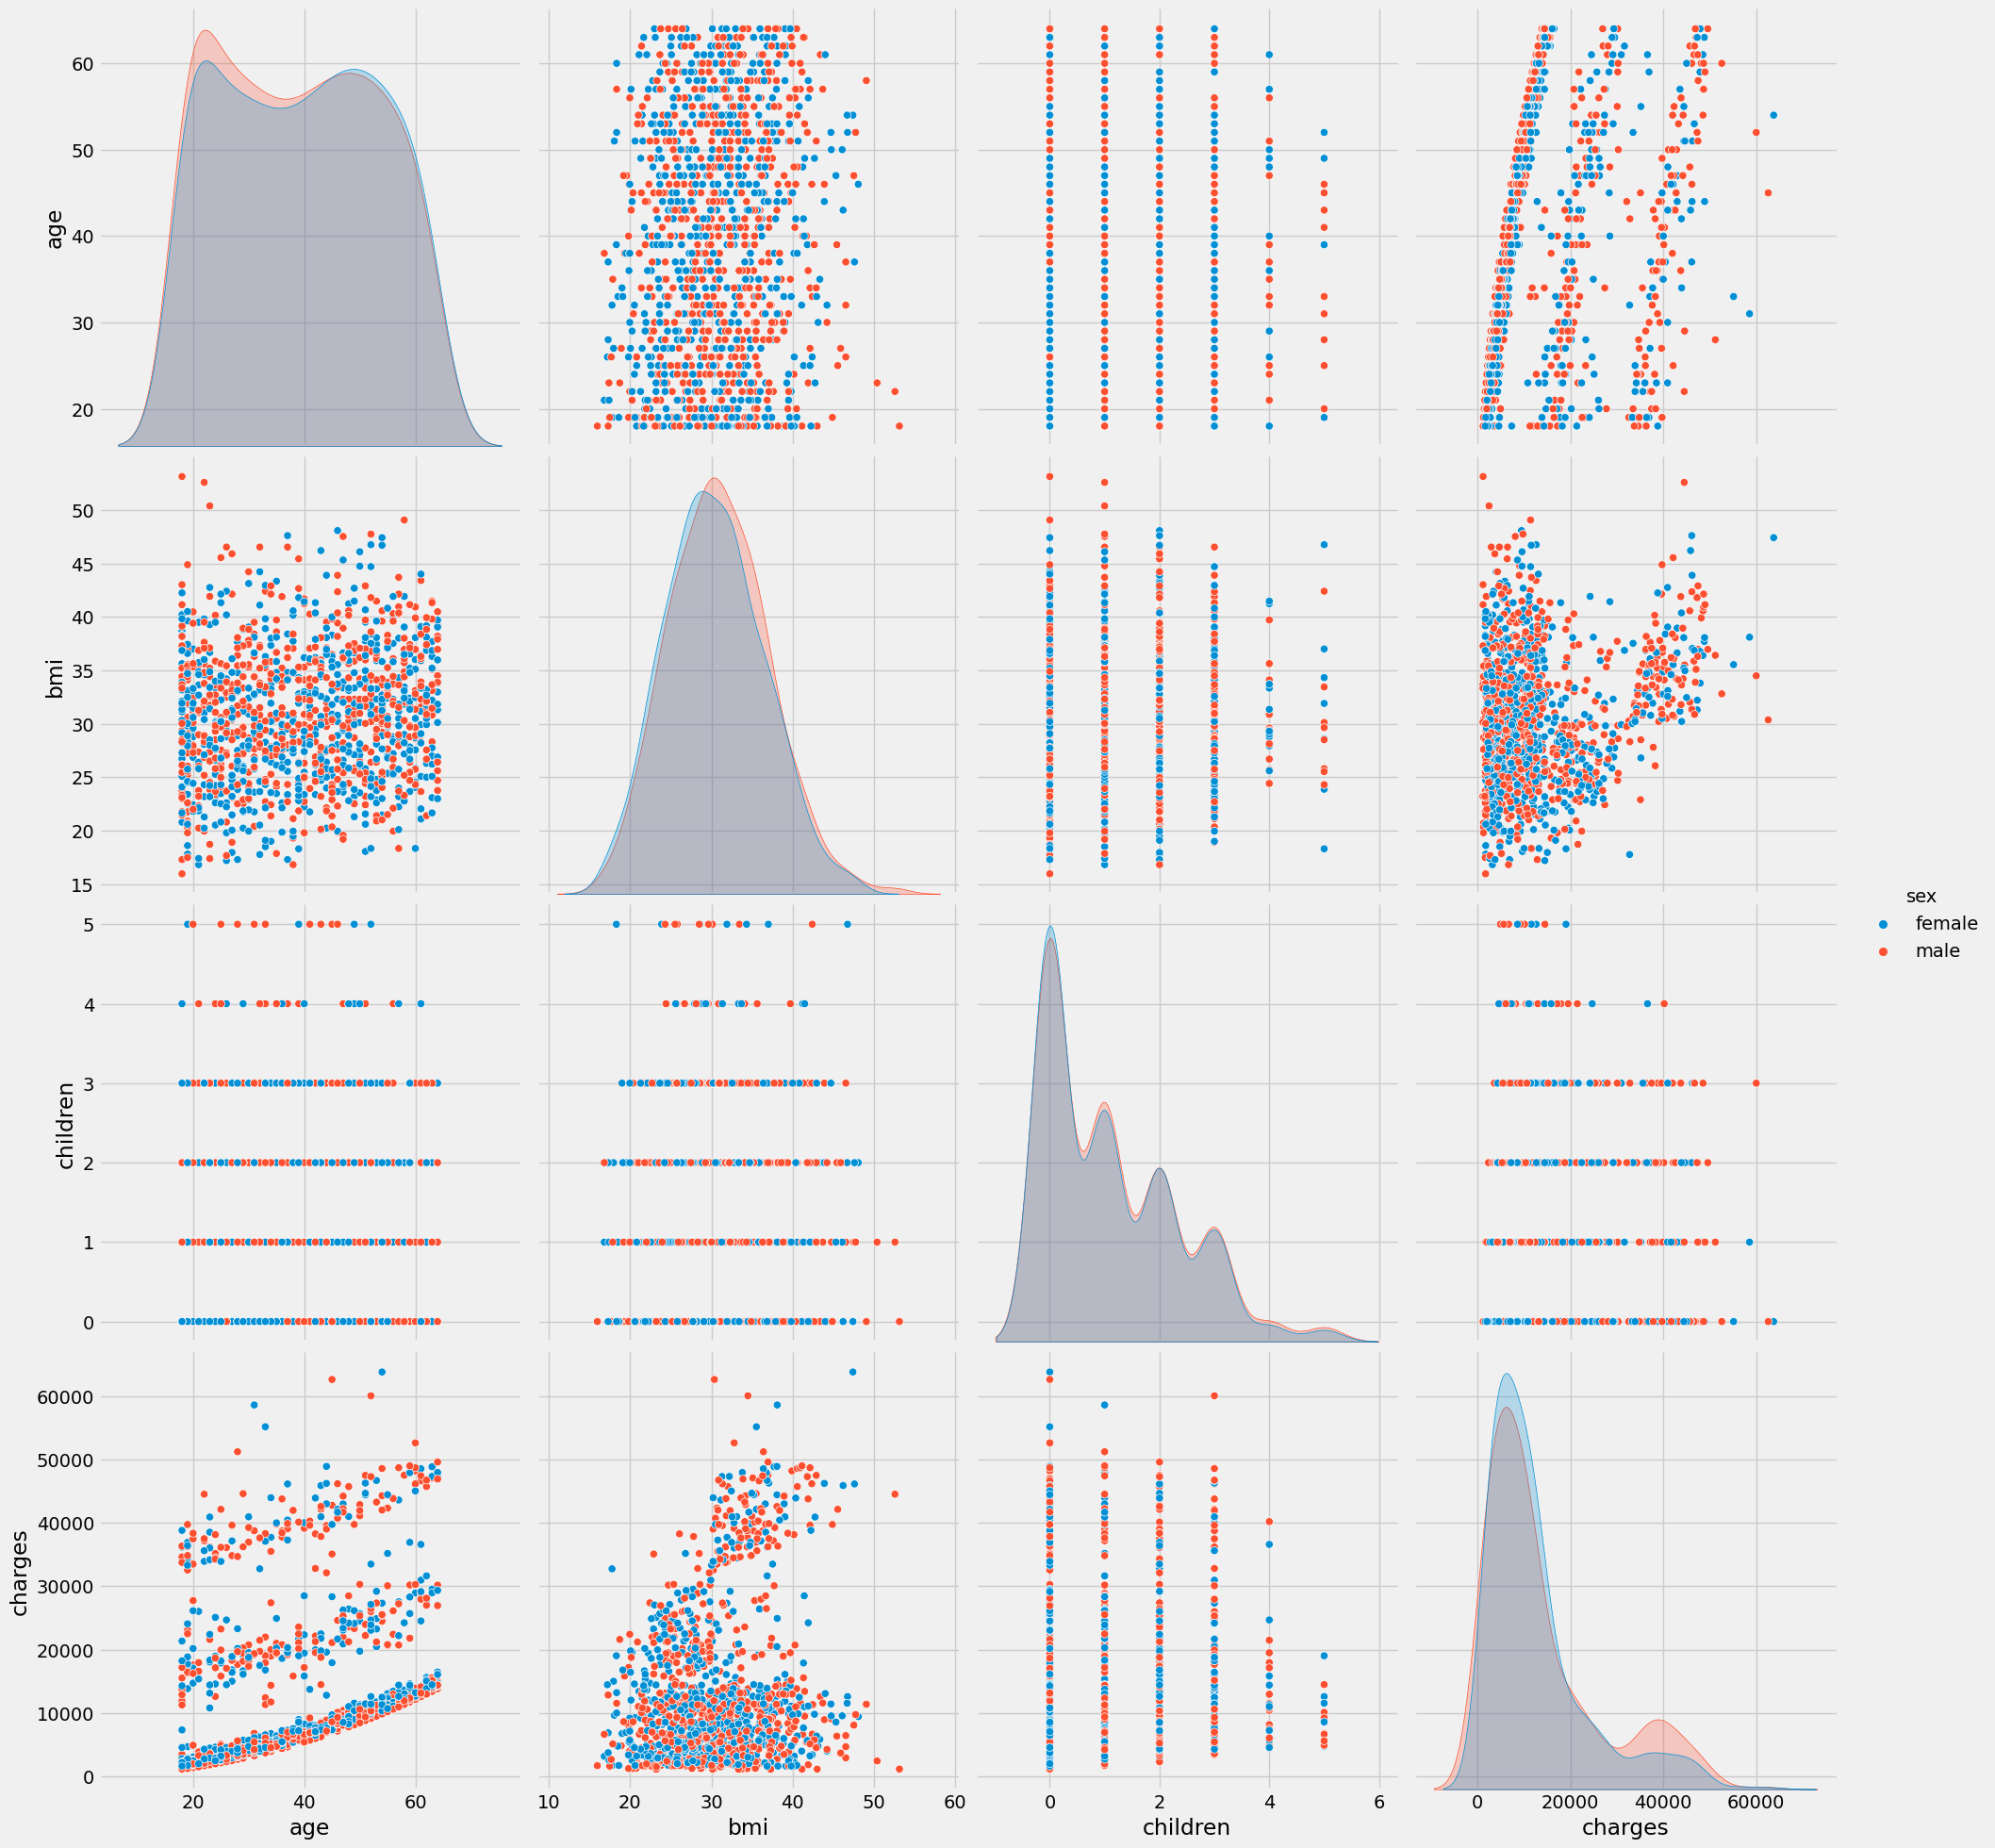

In [13]:
sns.pairplot(data= df, size = 5, hue = 'sex')

For the region and sex variables, the distribution of charges across different groups does not show any significant visual differences. We will now proceed with a more detailed numerical analysis to examine potential differences based on statistical metrics.

---

region（地域）や sex（性別）の各グループにおいては、顕著な分布の違いは確認されませんでした。そこで次に、数値的な指標を用いてグループ間の費用差をより詳細に分析していきます。

In [14]:
# 'smoker' 컬럼을 기준으로 그룹을 나누고, 각 그룹의 'charges' 평균을 계산
smoker_charges = df.groupby('smoker')['charges'].mean().sort_values(ascending=False)
print("--- Average Medical Expenses by Smoking Status ---")
print(smoker_charges)

print("\n" + "="*30 + "\n")

# 성별에 따른 평균 의료비
sex_charges = df.groupby('sex')['charges'].mean().sort_values(ascending=False)
print("--- Average Medical Expenses by Gender ---")
print(sex_charges)

print("\n" + "="*30 + "\n")


# 지역에 따른 평균 의료비
region_charges = df.groupby('region')['charges'].mean().sort_values(ascending=False)
print("--- Average Medical Expenses by Region ---")
print(region_charges)


--- Average Medical Expenses by Smoking Status ---
smoker
yes    32050.231832
no      8434.268298
Name: charges, dtype: float64


--- Average Medical Expenses by Gender ---
sex
male      13956.751178
female    12569.578844
Name: charges, dtype: float64


--- Average Medical Expenses by Region ---
region
southeast    14735.411438
northeast    13406.384516
northwest    12417.575374
southwest    12346.937377
Name: charges, dtype: float64


First, we observe that the average medical cost for smokers is nearly four times higher than that of non-smokers, indicating that smoking status is a highly influential factor in determining medical expenses.

In contrast, the average difference in charges by gender is approximately 1,400, and the difference among regions is also around 1,400. This suggests that gender and region may have relatively limited influence on medical charges.

Next, we will numerically assess the correlations between categorical variables and charges. Due to recent updates in the pandas library, categorical variables must be explicitly converted into numerical values to compute correlation coefficients. Therefore, we will manually encode the categorical features before proceeding with the correlation analysis.

---

まず、喫煙者と非喫煙者の平均医療費には約4倍もの差があることが確認できます。これは、喫煙の有無が charges（医療費）に対して非常に強い影響を持つ要因であることを示唆しています。

一方で、性別による平均費用の差は約1,400であり、地域ごとの違いも同様に約1,400の範囲内に収まっています。これは、性別や地域が医療費に与える影響は比較的小さい可能性があることを意味します。

続いて、カテゴリ変数と charges との数値的な相関関係を調べます。pandasライブラリの最近のアップデートにより、カテゴリ変数は数値型に明示的に変換しなければ相関係数を計算できなくなりました。そのため、カテゴリ変数を手動でエンコードした後に相関分析を実施します。

In [15]:
# 범주형 변수들을 원-핫 인코딩으로 변환합니다.
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# 상관관계 행렬 계산
correlation_matrix = df_encoded.corr()

# 'charges' 컬럼과 다른 변수들 간의 상관관계만 뽑아서 내림차순으로 정렬
charges_correlation = correlation_matrix['charges'].sort_values(ascending=False)

print("--- coefficient with Charges ---")
print(charges_correlation)

--- coefficient with Charges ---
charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


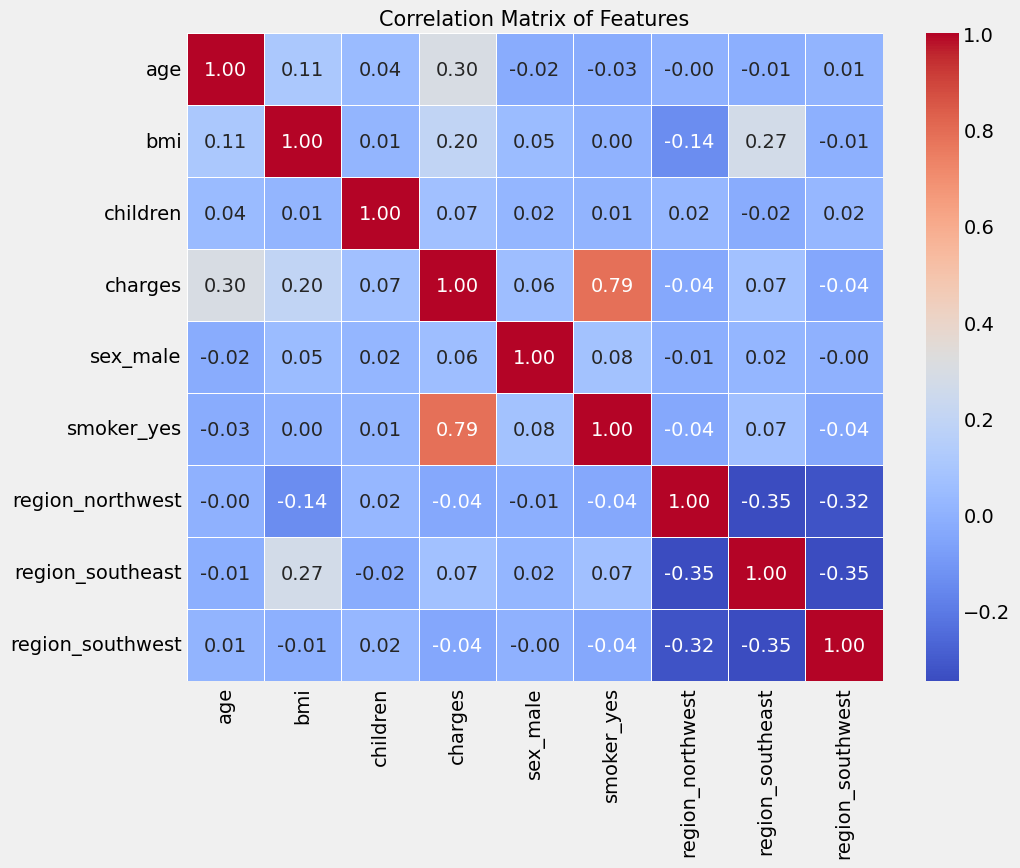

In [16]:
# --- Heatmap 시각화 ---
plt.figure(figsize=(10, 8)) # 시각화 도표의 크기를 설정합니다.

# sns.heatmap() 을 사용하여 히트맵을 생성합니다.
# annot=True : 각 셀에 숫자 값을 표시합니다.
# cmap='coolwarm' : 색상 맵을 지정합니다. (양의 상관관계는 붉은색, 음의 상관관계는 푸른색)
# fmt='.2f' : 셀에 표시될 숫자의 형식을 소수점 둘째 자리까지의 실수로 지정합니다.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix of Features', fontsize=15)
plt.show()

In [17]:
# 이전 단계에서 계산된 charges_correlation Series를 사용합니다.
# charges_correlation = correlation_matrix['charges'].sort_values(ascending=False)

# Series를 DataFrame으로 변환한 후, .style.background_gradient()를 적용합니다.
styled_correlation = charges_correlation.to_frame().style.background_gradient(cmap='coolwarm')

# Jupyter Notebook이나 Google Colab 환경에서 이 코드를 실행하면
# 배경색이 칠해진 예쁜 표가 출력됩니다.
styled_correlation

Notably, smoking status shows a strong positive correlation with medical expenses (charges).

The computed correlation coefficient is 0.7872, indicating that smokers tend to incur significantly higher medical costs. This result suggests that the smoker variable may serve as a highly influential predictor in modeling.

---

顕著なのは、喫煙の有無が医療費（charges）と強い正の相関関係を示している点です。

計算された相関係数は0.7872であり、これは喫煙者が高い医療費を支払う傾向が明確であることを意味します。この結果は、smoker 変数が予測モデルにおいて非常に強力な説明変数となる可能性が高いことを示唆しています。

# 2. Model Training and Evaluation

## 2-1. Import Libraries

In [18]:
# 0. 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from lightgbm import LGBMRegressor, early_stopping, log_evaluation
from xgboost import XGBRegressor
import optuna

# 경고 및 로깅 억제
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.CRITICAL)

print("=" * 80)
print("COMPREHENSIVE ML PIPELINE: Base → Optimized → Ensemble")
print("4 Algorithms × 2 Feature Sets × 2 Target Types × 3 Stages")
print("=" * 80)

COMPREHENSIVE ML PIPELINE: Base → Optimized → Ensemble
4 Algorithms × 2 Feature Sets × 2 Target Types × 3 Stages


## 2-2. Load data and split into Train/Test Set

#### Normalization of the Target Variable
Exploratory Data Analysis (EDA) revealed that the target variable, charges, does not follow a normal distribution, but instead resembles a power-law distribution.
In general, power-law distributions make it difficult for models to accurately predict small values, which can lead to biased or unstable model performance.

To address this, we compare two versions of the target variable: one using the original scale and the other transformed using a logarithmic transformation. This allows us to assess how normalization of the target variable affects model performance.
For models trained on the log-transformed target variable, the predicted outputs must be inverse-transformed to return them to the original scale. We achieve this using np.expm1.

##### Distribution of the Target Variable by Dataset
We split the data into training (80%) and test (20%) sets.
To ensure that the distribution of the target variable is preserved across both sets, we use the stratify parameter during the split.
Since the target variable is continuous, stratified splitting is not directly applicable. To overcome this, we divide the target variable into deciles (10 quantile bins) and treat it as a categorical variable solely for the purpose of stratification.
This approach ensures that the distribution of the target variable remains consistent across the training and test sets.

---

#### 目的変数の正規化
探索的データ分析（EDA）の結果、予測対象である charges（医療費） は正規分布ではなく、べき乗分布（power-law distribution） に近い形状を示していることが確認されました。
べき乗分布は小さい値に対する予測精度が低くなる傾向があり、モデルの性能に偏りが生じる可能性があります。

この問題に対処するため、目的変数に対して

- 元のスケール（非変換）

- 対数変換（log transformation）

の二つのバージョンを使って、モデルの性能を比較します。これにより、目的変数の正規化がモデルの予測精度に与える影響を検証することができます。
なお、対数変換後のデータで学習したモデルの予測値は、最終的に 元のスケールへ逆変換 する必要があります。その際には、np.expm1 を使用します。

#### データセット別における目的変数の分布
データは、80%をトレーニングセット、20%をテストセットとして分割します。
この際、トレーニングセットとテストセット間で目的変数の分布が可能な限り一致するようにするため、stratify パラメータを用いて層化抽出を行います。

しかし、目的変数が連続値であるため、そのままでは層化ができません。そこで、目的変数を 10分位（decile） に分割し、カテゴリ変数として扱うことで層化の条件を満たすように工夫しました。
この方法により、トレーニングセットとテストセットの目的変数分布を均等に保つことが可能になります。

In [19]:
# 1. 데이터 로드 및 초기 분할
df = pd.read_csv('/kaggle/input/insurance.csv')
seed = 42
target_col = 'charges'

# 로그 변환 후 stratified binning
df['charges_log'] = np.log1p(df[target_col])
df['charges_bin'], bins = pd.qcut(df['charges_log'], q=10, labels=False, retbins=True, duplicates='drop')

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['charges_bin'], random_state=seed)
train_df = train_df.drop(columns=['charges_log', 'charges_bin'])
test_df = test_df.drop(columns=['charges_log', 'charges_bin'])

print(f"📊 Dataset: {len(train_df)} train, {len(test_df)} test samples")

📊 Dataset: 1070 train, 268 test samples


## 2-3. Data Engineering

Before training the model, we first preprocess the categorical variables.
There are two major approaches for handling categorical variables: One-Hot Encoding and Label Encoding, each with different characteristics.

- One-Hot Encoding: Creates new binary columns for each category, assigning 1 if a row belongs to that category and 0 otherwise.

- Label Encoding: Assigns a unique integer to each category. For example, in the region column, categories might be mapped as: Southeast → 1, Southwest → 2, Northeast → 3, Northwest → 4.

While Label Encoding is straightforward, it can introduce unintended ordinal relationships between categories. For instance, even if there is no inherent order among regions, linear models like Linear Regression may mistakenly interpret the encoded values as having linear relationships. Therefore, caution is required when using this method.

In this project, all categorical features—sex, smoker, and region—will be encoded using One-Hot Encoding to avoid such issues.

After completing preprocessing of the categorical variables, we will proceed to train models using two types of datasets:

1. one with second-order polynomial features applied, and

2. one without polynomial transformation.

This comparison will allow us to assess how much the introduction of second-order polynomial features contributes to improving model performance.

As a result, we will have a total of four datasets for modeling:

1. processed_original: original target variable, no polynomial features

2. processed_log: log-transformed target variable, no polynomial features

3. poly_original: original target variable with second-order polynomial features

4. poly_log: log-transformed target variable with second-order polynomial features

---

モデルの学習に先立ち、まず**カテゴリ変数**の前処理を行います。
カテゴリ変数の処理方法には主に2つのアプローチが存在します：**One-Hot Encoding（ワンホットエンコーディング）とLabel Encoding（ラベルエンコーディング）**です。

- One-Hot Encoding：各カテゴリごとに新たな列を作成し、該当する行には1、それ以外には0を割り当てる手法です。

- Label Encoding：各カテゴリに一意の整数ラベルを割り当てる方法です。例えば、region列に対して、Southeast → 1、Southwest → 2、Northeast → 3、Northwest → 4 などとエンコードします。

Label Encodingは実装が簡単な一方で、カテゴリ間に順位関係が存在しないにもかかわらず、線形回帰モデルなどがその数値を順序的な関係として誤認するリスクがあります。したがって、線形モデルを用いる場合、カテゴリ変数のエンコーディングには注意が必要です。

本プロジェクトでは、カテゴリ変数である sex（性別）、smoker（喫煙者かどうか）、region（地域） の全てに対して、One-Hot Encodingを用いて前処理を行います。

カテゴリ変数の前処理が完了した後は、

1. 2次の多項式特徴量（Polynomial Features） を適用したデータセットと、

2. 適用しないデータセット

の2種類を用いてモデルを学習させます。

この比較を通じて、2次多項式特徴量の導入がモデルの性能向上にどの程度貢献するかを確認します。

最終的に使用するデータセットは、以下の4種類になります：

1. processed_original：目的変数は元のスケール、多項式特徴量なし

2. processed_log：目的変数は対数変換済み、多項式特徴量なし

3. poly_original：目的変数は元のスケール、2次多項式特徴量あり

4. poly_log：目的変数は対数変換済み、2次多項式特徴量あり

In [20]:
# 2. 전처리: 이진 Label Encoding
def label_encode(df):
    df = df.copy()
    df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
    df['sex'] = df['sex'].map({'male': 1, 'female': 0})
    return df

train_df = label_encode(train_df)
test_df = label_encode(test_df)

cat_cols = ['region']
num_cols = train_df.select_dtypes(exclude='object').drop(columns=[target_col]).columns

# 전처리 객체 초기화
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_df[cat_cols])

poly = PolynomialFeatures(degree=2, include_bias=False)

# Feature 생성 함수
def make_features(df_base, fit_poly=False):
    encoded = encoder.transform(df_base[cat_cols])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_cols), index=df_base.index)
    full_features = pd.concat([df_base[num_cols], encoded_df], axis=1)
    
    if fit_poly:
        poly_features = poly.fit_transform(full_features)
    else:
        poly_features = poly.transform(full_features)
    
    poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(full_features.columns), index=df_base.index)
    return full_features, poly_df

# 피처 생성
X_train_proc, X_train_poly = make_features(train_df, fit_poly=True)
X_test_proc, X_test_poly = make_features(test_df, fit_poly=False)

# 타겟 변수 준비
y_train_original = train_df[target_col].values
y_test_original = test_df[target_col].values
y_train_log = np.log1p(y_train_original)
y_test_log = np.log1p(y_test_original)

# 3. 설정
features = {
    'processed': (X_train_proc, X_test_proc),
    'poly2': (X_train_poly, X_test_poly)
}

targets = {
    'original': (y_train_original, y_test_original, False),
    'log': (y_train_log, y_test_log, True)
}

models_config = {
    'linear': LinearRegression(),
    'lightgbm': LGBMRegressor(
        learning_rate=0.05, n_estimators=200, num_leaves=31, max_depth=7,
        min_child_samples=20, subsample=0.8, colsample_bytree=0.8,
        reg_alpha=0.1, reg_lambda=0.1, random_state=seed, verbosity=-1
    ),
    'xgboost': XGBRegressor(
        learning_rate=0.05, n_estimators=200, max_depth=7, min_child_weight=20,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=0.1,
        random_state=seed, verbosity=0
    ),
    'randomforest': RandomForestRegressor(
        n_estimators=200, max_depth=10, min_samples_split=20, min_samples_leaf=10,
        max_features=0.8, random_state=seed, n_jobs=-1
    )
}


In [21]:
X_train_proc.head()


age  sex     bmi  children  smoker  region_northeast  region_northwest  \
806    40    0  41.420         1       0               0.0               1.0   
346    33    1  35.750         2       0               0.0               0.0   
453    20    1  29.735         0       0               0.0               1.0   
1134   28    1  33.820         0       0               0.0               1.0   
220    34    0  33.700         1       0               0.0               0.0   

      region_southeast  region_southwest  
806                0.0               0.0  
346                1.0               0.0  
453                0.0               0.0  
1134               0.0               0.0  
220                0.0               1.0

In [22]:
X_train_poly.head()

age  sex     bmi  children  smoker  region_northeast  region_northwest  \
806   40.0  0.0  41.420       1.0     0.0               0.0               1.0   
346   33.0  1.0  35.750       2.0     0.0               0.0               0.0   
453   20.0  1.0  29.735       0.0     0.0               0.0               1.0   
1134  28.0  1.0  33.820       0.0     0.0               0.0               1.0   
220   34.0  0.0  33.700       1.0     0.0               0.0               0.0   

      region_southeast  region_southwest   age^2  ...  region_northeast^2  \
806                0.0               0.0  1600.0  ...                 0.0   
346                1.0               0.0  1089.0  ...                 0.0   
453                0.0               0.0   400.0  ...                 0.0   
1134               0.0               0.0   784.0  ...                 0.0   
220                0.0               1.0  1156.0  ...                 0.0   

      region_northeast region_northwest  region_northeast region_southeast  \
806                                 0.0                                0.0   
346                                 0.0                                0.0   
453                                 0.0                                0.0   
1134                                0.0                                0.0   
220                                 0.0                                0.0   

      region_northeast region_southwest  region_northwest^2  \
806                                 0.0                 1.0   
346                                 0.0                 0.0   
453                                 0.0                 1.0   
1134                                0.0                 1.0   
220                                 0.0                 0.0   

      region_northwest region_southeast  region_northwest region_southwest  \
806                                 0.0                                0.0   
346                                 0.0                                0.0   
453                                 0.0                                0.0   
1134                                0.0                                0.0   
220                                 0.0                                0.0   

      region_southeast^2  region_southeast region_southwest  \
806                  0.0                                0.0   
346                  1.0                                0.0   
453                  0.0                                0.0   
1134                 0.0                                0.0   
220                  0.0                                0.0   

      region_southwest^2  
806                  0.0  
346                  0.0  
453                  0.0  
1134                 0.0  
220                  1.0  

[5 rows x 54 columns]

In [23]:
X_train_poly.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'age^2',
       'age sex', 'age bmi', 'age children', 'age smoker',
       'age region_northeast', 'age region_northwest', 'age region_southeast',
       'age region_southwest', 'sex^2', 'sex bmi', 'sex children',
       'sex smoker', 'sex region_northeast', 'sex region_northwest',
       'sex region_southeast', 'sex region_southwest', 'bmi^2', 'bmi children',
       'bmi smoker', 'bmi region_northeast', 'bmi region_northwest',
       'bmi region_southeast', 'bmi region_southwest', 'children^2',
       'children smoker', 'children region_northeast',
       'children region_northwest', 'children region_southeast',
       'children region_southwest', 'smoker^2', 'smoker region_northeast',
       'smoker region_northwest', 'smoker region_southeast',
       'smoker region_southwest', 'region_northeast^2',
       'region_northeast region_northwest',
      

## 2.4 Model Training and Evaluation

이번 프로젝트를 위한 알고리즘으로 LinearRegression, RandomForest, XGBoost, lightGBM, 총 4개를 선택하였습니다. 제가 왜 다음과 같은 모델을 선택하였는지, 모델에 대한 간략한 소개와 함께 설명하도록 하겠습니다. 

1. ### LinearRegression
    - 선형 회귀는 가장 기본적인 회귀 알고리즘으로, 타겟 변수와 독립 변수 간의 선형 관계를 가정합니다. 모델의 해석이 직관적이고, 변수 간의 영향력을 파악하기에 적합합니다. 데이터에 다중공선성이나 비선형성이 크지 않다면 간단하면서도 효과적인 기준 모델(Baseline model)로 활용할 수 있습니다.
2. ### RandomForest
    -  랜덤 포레스트는 여러 개의 결정 트리(Decision Trees)를 앙상블하여 예측 성능을 높이는 모델입니다. 과적합(overfitting)에 강하고, 비선형 관계나 변수 간 상호작용도 잘 포착할 수 있어 의료비와 같이 다양한 요인에 의해 결정되는 연속형 데이터를 예측하는 데 유용합니다.
4. ### XGBoost
    - XGBoost는 그래디언트 부스팅 기반의 강력한 앙상블 모델로, 학습 속도가 빠르고 정규화 기능이 내장되어 있어 과적합을 잘 방지합니다. 복잡한 관계나 잡음을 포함한 데이터에서도 높은 예측 성능을 보여주며, 실제로 많은 캐글(Kaggle) 대회에서 우수한 성과를 거두고 있는 모델입니다.
6. ### lightGBM
    - LightGBM은 XGBoost와 유사한 방식의 부스팅 모델이지만, 더 빠른 학습 속도와 더 적은 메모리 사용량을 목표로 설계되었습니다. 특히 대규모 데이터셋이나 범주형 변수가 많은 데이터에서 효율적으로 작동하며, 의료비 예측과 같은 회귀 문제에서도 강력한 성능을 보여줄 수 있습니다.
  
위의 알고리즘들은 선형회귀학습을 위한 매우 대표적인 알고리즘들입니다. 특히, XGBoost나 lightGBM과 같은 Gradient Boost 알고리즘들은 Kaggle과 같은 경연대회의 상위 솔루션에서 자주 사용되는 알고리즘들이므로, 위 알고리즘들을 채택하였습니다.

In [24]:
# =====================================================================
# STAGE 1: 베이스 모델 성능 비교
# =====================================================================
print("\n🔄 STAGE 1: Training base models...")

def train_and_evaluate_model(model, model_name, X_tr, X_te, y_tr, y_te, is_log_target=False):
    """모델 훈련 및 평가 함수"""
    X_tr_sub, X_cv_sub, y_tr_sub, y_cv_sub = train_test_split(
        X_tr, y_tr, test_size=0.2, random_state=seed
    )
    
    # 모델 학습
    if model_name == 'lightgbm':
        model.fit(X_tr_sub, y_tr_sub, eval_set=[(X_cv_sub, y_cv_sub)],
                 callbacks=[early_stopping(stopping_rounds=20), log_evaluation(period=0)])
    elif model_name == 'xgboost':
        model.fit(X_tr_sub, y_tr_sub, eval_set=[(X_cv_sub, y_cv_sub)],
                 early_stopping_rounds=20, verbose=False)
    else:
        model.fit(X_tr_sub, y_tr_sub)
    
    # 예측
    pred_train = model.predict(X_tr_sub)
    pred_cv = model.predict(X_cv_sub)
    pred_test = model.predict(X_te)
    
    # 로그 변환 복원
    if is_log_target:
        pred_train = np.expm1(pred_train)
        pred_cv = np.expm1(pred_cv)
        pred_test = np.expm1(pred_test)
        y_tr_eval = np.expm1(y_tr_sub)
        y_cv_eval = np.expm1(y_cv_sub)
        y_te_eval = np.expm1(y_te)
    else:
        y_tr_eval = y_tr_sub
        y_cv_eval = y_cv_sub
        y_te_eval = y_te
    
    return {
        'train_rmse': round(mean_squared_error(y_tr_eval, pred_train, squared=False), 4),
        'train_mae': round(mean_absolute_error(y_tr_eval, pred_train), 4),
        'train_r2': round(r2_score(y_tr_eval, pred_train), 4),
        'cv_rmse': round(mean_squared_error(y_cv_eval, pred_cv, squared=False), 4),
        'cv_mae': round(mean_absolute_error(y_cv_eval, pred_cv), 4),
        'cv_r2': round(r2_score(y_cv_eval, pred_cv), 4),
        'test_rmse': round(mean_squared_error(y_te_eval, pred_test, squared=False), 4),
        'test_mae': round(mean_absolute_error(y_te_eval, pred_test), 4),
        'test_r2': round(r2_score(y_te_eval, pred_test), 4)
    }

base_results = []
for model_name, model in models_config.items():
    for feat_name, (X_tr, X_te) in features.items():
        for target_name, (y_tr, y_te, is_log) in targets.items():
            metrics = train_and_evaluate_model(model, model_name, X_tr, X_te, y_tr, y_te, is_log)
            metrics.update({
                'model': f'{model_name}_{feat_name}_{target_name}',
                'algorithm': model_name,
                'features': feat_name,
                'target': target_name,
                'stage': 'base'
            })
            base_results.append(metrics)

base_results_df = pd.DataFrame(base_results)
print("✅ Base models completed!")
print(base_results_df)


🔄 STAGE 1: Training base models...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[92]	valid_0's l2: 1.62021e+07
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[80]	valid_0's l2: 0.116356
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[72]	valid_0's l2: 1.62885e+07
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[73]	valid_0's l2: 0.121471
✅ Base models completed!
    train_rmse  train_mae  train_r2    cv_rmse     cv_mae   cv_r2  test_rmse  \
0    6131.8541  4313.1442    0.7432  5676.5362  4155.1718  0.7674  6112.5345   
1    8103.4093  4160.2353    0.5516  7553.6085  4013.6860  0.5882  8454.9720   
2    4741.4011  2942.2099    0.8465  4448.4111  2857.3298  0.8572  5086.5816   
3    5064.4890  2656.1577    0.8248  4730.6784  2585.9541  0.8385  5163.2859   
4    3690.5891  2109.1360    0.9070  

저는 MAE, RMSE, R2, 총 3개의 매트릭스 평가 방법을 사용하였습니다. 각각의 매트릭스에 대해 간략하게 설명하며, 제가 왜 다음과 같은 매트릭스들을 선택하였는지, 설명하도록 하겠습니다.


1. MAE
- MAE는 실제 값과 예측 값 사이의 절대 오차의 평균을 의미합니다. 해석이 직관적이며, 이상치(outlier)에 크게 영향을 받지 않는다는 장점이 있습니다. 예측값이 실제값과 평균적으로 얼마나 차이 나는지를 알 수 있어, 모델의 실질적인 예측 오차 수준을 이해하는 데 유용합니다.

3. RMSE
- RMSE는 오차의 제곱 평균에 루트를 씌운 값으로, 큰 오차에 더 큰 패널티를 부여합니다. MAE보다 이상치에 민감하며, 예측값이 실제값에서 많이 벗어나는 경우를 더 강조하여 평가할 수 있습니다. 모델이 큰 오차 없이 안정적으로 예측하는지를 확인하고자 할 때 적합한 지표입니다.

4. R2
- R²는 독립 변수가 타겟 변수를 얼마나 잘 설명하는지를 나타내는 지표로, 0에서 1 사이의 값을 가집니다. 1에 가까울수록 모델이 데이터를 잘 설명한다는 의미입니다. R²는 모델의 전체적인 설명력을 파악하는 데 효과적입니다.


모델들을 평가할 때, 여러 가지의 매트릭스를 동시에 사용하는 것은 중요합니다. 왜냐하면 각 지표가 포착하는 관점이 다르기 때문입니다. 예를 들어, MAE는 전체적인 예측 오차의 평균을 보여주지만, RMSE는 큰 오차에 더 민감하게 반응합니다. R²는 모델의 설명력을 전반적으로 평가합니다. 이러한 지표들을 함께 고려함으로써, 모델이 단순히 평균적으로 잘 예측하는지를 넘어서, 이상치에 대한 민감도나 변수 설명력 등 다양한 관점에서의 성능을 종합적으로 평가할 수 있습니다.


## 2-5. Hyperparameter Optimization for LightGBM

In the previous models, the hyperparameters for LightGBMRegressor were manually adjusted. In this section, we utilize the Optuna library to automatically optimize the hyperparameters, train the model using the best configuration, and evaluate its predictive performance.

---
前節のモデルでは、LightGBMRegressor のハイパーパラメータを手動で調整しました。本節では、Optuna ライブラリを活用してハイパーパラメータを自動的に最適化し、最適な設定でモデルを学習させた後、その予測性能を評価します。

In [25]:
# =====================================================================
# STAGE 2: Optuna 하이퍼파라미터 최적화
# =====================================================================
print("\n🔍 STAGE 2: Hyperparameter optimization with Optuna...")

def create_objective(model_name, X_train, y_train, is_log_target=False):
    def objective(trial):
        X_tr_sub, X_val_sub, y_tr_sub, y_val_sub = train_test_split(
            X_train, y_train, test_size=0.2, random_state=seed
        )
        
        if model_name == 'lightgbm':
            params = {
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'n_estimators': 1000,
                'num_leaves': trial.suggest_int('num_leaves', 16, 128),
                'max_depth': trial.suggest_int('max_depth', 3, 12),
                'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
                'random_state': seed, 'verbosity': -1
            }
            model = LGBMRegressor(**params)
            model.fit(X_tr_sub, y_tr_sub, eval_set=[(X_val_sub, y_val_sub)],
                     callbacks=[early_stopping(15), log_evaluation(period=0)])
                     
        elif model_name == 'xgboost':
            params = {
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
                'n_estimators': 1000,
                'max_depth': trial.suggest_int('max_depth', 3, 12),
                'min_child_weight': trial.suggest_int('min_child_weight', 5, 50),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
                'random_state': seed, 'verbosity': 0
            }
            model = XGBRegressor(**params)
            model.fit(X_tr_sub, y_tr_sub, eval_set=[(X_val_sub, y_val_sub)],
                     early_stopping_rounds=15, verbose=False)
                     
        elif model_name == 'randomforest':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 100, 300),
                'max_depth': trial.suggest_int('max_depth', 5, 15),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_float('max_features', 0.3, 1.0),
                'random_state': seed, 'n_jobs': -1
            }
            model = RandomForestRegressor(**params)
            model.fit(X_tr_sub, y_tr_sub)
        
        preds = model.predict(X_val_sub)
        
        # 로그 변환 복원 후 평가
        if is_log_target:
            preds = np.expm1(preds)
            y_val_eval = np.expm1(y_val_sub)
        else:
            y_val_eval = y_val_sub
            
        return mean_squared_error(y_val_eval, preds, squared=False)
    
    return objective

# 최적화 실행
optimized_results = []
best_params_storage = {}

for model_name in ['lightgbm', 'xgboost', 'randomforest']:
    for feat_name, (X_tr, X_te) in features.items():
        for target_name, (y_tr, y_te, is_log) in targets.items():
            print(f"  ⚡ Optimizing {model_name}_{feat_name}_{target_name}...")
            
            # Optuna 최적화
            study = optuna.create_study(direction='minimize', 
                                      sampler=optuna.samplers.TPESampler(seed=seed))
            study.optimize(create_objective(model_name, X_tr, y_tr, is_log), 
                          n_trials=50, show_progress_bar=False)
            
            # 최적 파라미터 저장
            key = f'{model_name}_{feat_name}_{target_name}'
            best_params_storage[key] = study.best_trial.params
            
            # 최적 파라미터로 재학습 및 평가
            best_params = study.best_trial.params.copy()
            
            if model_name == 'lightgbm':
                best_params.update({'n_estimators': 1000, 'random_state': seed, 'verbosity': -1})
                model = LGBMRegressor(**best_params)
            elif model_name == 'xgboost':
                best_params.update({'n_estimators': 1000, 'random_state': seed, 'verbosity': 0})
                model = XGBRegressor(**best_params)
            elif model_name == 'randomforest':
                best_params.update({'random_state': seed, 'n_jobs': -1})
                model = RandomForestRegressor(**best_params)
            
            metrics = train_and_evaluate_model(model, model_name, X_tr, X_te, y_tr, y_te, is_log)
            metrics.update({
                'model': f'{model_name}_opt_{feat_name}_{target_name}',
                'algorithm': model_name,
                'features': feat_name,
                'target': target_name,
                'stage': 'optimized'
            })
            optimized_results.append(metrics)

# Linear 모델도 추가 (최적화 없음)
for feat_name, (X_tr, X_te) in features.items():
    for target_name, (y_tr, y_te, is_log) in targets.items():
        model = LinearRegression()
        metrics = train_and_evaluate_model(model, 'linear', X_tr, X_te, y_tr, y_te, is_log)
        metrics.update({
            'model': f'linear_opt_{feat_name}_{target_name}',
            'algorithm': 'linear',
            'features': feat_name,
            'target': target_name,
            'stage': 'optimized'
        })
        optimized_results.append(metrics)

optimized_results_df = pd.DataFrame(optimized_results)
print("✅ Hyperparameter optimization completed!")
print(optimized_results_df)


🔍 STAGE 2: Hyperparameter optimization with Optuna...
  ⚡ Optimizing lightgbm_processed_original...
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[192]	valid_0's l2: 1.61412e+07
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[92]	valid_0's l2: 1.59891e+07
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[287]	valid_0's l2: 1.74119e+07
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[169]	valid_0's l2: 1.57874e+07
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[673]	valid_0's l2: 1.57541e+07
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[332]	valid_0's l2: 1.5416e+07
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[58]	valid_0's l2: 1.55472e+07
Traini

Upon evaluating the model trained with the optimized hyperparameters, we observe a slight improvement in performance compared to the original model.

Test RMSE improved by 49.8941

Test MAE improved by 58.677

R² score increased from 0.8587 to 0.8617

These results demonstrate that hyperparameter optimization has led to enhanced generalization capability on the test set.

---

最適化されたハイパーパラメータで学習させたモデルの性能を評価した結果、元のモデルと比較してわずかながら性能向上が見られました。

Test RMSE が 49.8941 向上

Test MAE が 58.677 向上

R²スコア は 0.8587 から 0.8617 に上昇

これらの結果から、ハイパーパラメータ最適化によってテストデータに対する汎化性能が改善されたことがわかります。

## 2-6. Stacking

To further maximize model performance, we apply a stacking technique. As base models, we use the lgbm_processed and lgbm_poly models. Then, the predictions from each fold in K-Fold cross-validation are aggregated and used as input features for the next stage, where a simple linear regression model is trained as the meta-model.

---

モデル性能をさらに最大限に引き出すため、スタッキング手法を適用します。ベースモデルとしては、lgbm_processedモデルとlgbm_polyモデルの2つを使用します。その後、K-Fold交差検証における各フォールドの予測値を集約し、それらを次のステージの入力特徴量として利用し、シンプルな線形回帰モデルをメタモデルとして学習させます。

In [26]:
# =====================================================================
# STAGE 3: 스태킹 앙상블 (최고 성능 타겟 타입 사용)
# =====================================================================
print("\n🔗 STAGE 3: Building Advanced Stacking Ensemble...")

# 최고 성능 타겟 타입 선택
all_results = pd.concat([base_results_df, optimized_results_df])
best_target_type = all_results.groupby('target')['test_mae'].mean().idxmin()
print(f"📊 Using '{best_target_type}' target type for ensemble (lowest avg MAE)")

# 선택된 타겟 타입 설정
y_ensemble_train, y_ensemble_test, is_log_ensemble = targets[best_target_type]

# 5-Fold CV를 위한 설정
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# OOF 예측 및 테스트 예측 저장
oof_predictions = {}
test_predictions = {}

ensemble_models = ['lightgbm', 'xgboost', 'randomforest', 'linear']

for model_name in ensemble_models:
    for feat_name, (X_tr, X_te) in features.items():
        model_key = f'{model_name}_{feat_name}'
        oof_pred = np.zeros(len(X_tr))
        test_fold_preds = []
        
        print(f"  🔄 Processing {model_key} for ensemble...")
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_tr)):
            X_fold_train = X_tr.iloc[train_idx]
            X_fold_val = X_tr.iloc[val_idx]
            y_fold_train = y_ensemble_train[train_idx]
            y_fold_val = y_ensemble_train[val_idx]
            
            # 모델 생성 및 학습
            if model_name == 'linear':
                model = LinearRegression()
                model.fit(X_fold_train, y_fold_train)
                
            elif model_name in ['lightgbm', 'xgboost', 'randomforest']:
                # 최적화된 파라미터 사용
                param_key = f'{model_name}_{feat_name}_{best_target_type}'
                if param_key in best_params_storage:
                    best_params = best_params_storage[param_key].copy()
                else:
                    best_params = {}
                
                if model_name == 'lightgbm':
                    best_params.update({'n_estimators': 1000, 'random_state': seed, 'verbosity': -1})
                    model = LGBMRegressor(**best_params)
                    model.fit(X_fold_train, y_fold_train, eval_set=[(X_fold_val, y_fold_val)],
                             callbacks=[early_stopping(15), log_evaluation(period=0)])
                             
                elif model_name == 'xgboost':
                    best_params.update({'n_estimators': 1000, 'random_state': seed, 'verbosity': 0})
                    model = XGBRegressor(**best_params)
                    model.fit(X_fold_train, y_fold_train, eval_set=[(X_fold_val, y_fold_val)],
                             early_stopping_rounds=15, verbose=False)
                             
                elif model_name == 'randomforest':
                    best_params.update({'random_state': seed, 'n_jobs': -1})
                    model = RandomForestRegressor(**best_params)
                    model.fit(X_fold_train, y_fold_train)
            
            # OOF 예측
            oof_pred[val_idx] = model.predict(X_fold_val)
            # 테스트 예측
            test_fold_preds.append(model.predict(X_te))
        
        oof_predictions[model_key] = oof_pred
        test_predictions[model_key] = np.mean(test_fold_preds, axis=0)

# 메타 모델 학습
oof_df = pd.DataFrame(oof_predictions)
test_pred_df = pd.DataFrame(test_predictions)

# 다양한 메타 모델 시도
meta_models = {
    'linear': LinearRegression(),
    'ridge': LinearRegression(),  # Ridge는 별도 import 필요하므로 Linear로 대체
}

ensemble_results = []
best_ensemble_result = None
best_ensemble_mae = float('inf')

for meta_name, meta_model in meta_models.items():
    meta_model.fit(oof_df, y_ensemble_train)
    
    # OOF 예측 (메타 모델)
    oof_meta_pred = meta_model.predict(oof_df)
    # 최종 테스트 예측
    final_pred = meta_model.predict(test_pred_df)
    
    # 로그 변환 복원
    if is_log_ensemble:
        oof_meta_pred = np.expm1(oof_meta_pred)
        final_pred = np.expm1(final_pred)
        y_train_eval = np.expm1(y_ensemble_train)
        y_test_eval = np.expm1(y_ensemble_test)
    else:
        y_train_eval = y_ensemble_train
        y_test_eval = y_ensemble_test
    
    # 성능 계산
    train_mae = round(mean_absolute_error(y_train_eval, oof_meta_pred), 4)
    train_rmse = round(mean_squared_error(y_train_eval, oof_meta_pred, squared=False), 4)
    train_r2 = round(r2_score(y_train_eval, oof_meta_pred), 4)
    
    test_mae = round(mean_absolute_error(y_test_eval, final_pred), 4)
    test_rmse = round(mean_squared_error(y_test_eval, final_pred, squared=False), 4)
    test_r2 = round(r2_score(y_test_eval, final_pred), 4)
    
    # 최고 성능 앙상블 저장 (산포도용)
    if test_mae < best_ensemble_mae:
        best_ensemble_mae = test_mae
        best_ensemble_result = {
            'y_test': y_test_eval,
            'final_pred': final_pred,
            'ensemble_mae': test_mae,
            'ensemble_rmse': test_rmse,
            'ensemble_r2': test_r2,
            'meta_name': meta_name
        }
    
    ensemble_results.append({
        'model': f'stacking_ensemble_{meta_name}',
        'algorithm': 'ensemble',
        'features': 'combined',
        'target': best_target_type,
        'stage': 'ensemble',
        'train_mae': train_mae,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'test_r2': test_r2
    })

ensemble_results_df = pd.DataFrame(ensemble_results)
print("✅ Stacking ensemble completed!")
print(ensemble_results_df)

# 산포도용 변수 추출
y_test = best_ensemble_result['y_test']
final_pred = best_ensemble_result['final_pred']
ensemble_mae = best_ensemble_result['ensemble_mae']
ensemble_rmse = best_ensemble_result['ensemble_rmse']
ensemble_r2 = best_ensemble_result['ensemble_r2']


🔗 STAGE 3: Building Advanced Stacking Ensemble...
📊 Using 'log' target type for ensemble (lowest avg MAE)
  🔄 Processing lightgbm_processed for ensemble...
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[18]	valid_0's l2: 0.107599
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[18]	valid_0's l2: 0.137973
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 0.134905
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 0.171098
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 0.1671
  🔄 Processing lightgbm_poly2 for ensemble...
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[323]	valid_0's l2: 0.113591
Training until validation scores don't improve for 15 

As a result, the final stacked model demonstrates the best performance among all models developed thus far.

--- 

最終的なスタッキングモデルは、これまでに構築したすべてのモデルの中で最も優れた性能を示しています。

# 3. Summary

## 3-1. Overall Results and Visualization

## 3-2. Final Predictions vs Real Value Scatter

The above scatter plot visualizes the relationship between the final model’s predictions and the actual target values.
Although there are a few individual samples where prediction errors are noticeable, the model demonstrates strong overall alignment with the true values, indicating good predictive performance.

---

上記の散布図は、最終モデルによる予測値と実際のターゲット値との関係を示しています。
一部のサンプルでは予測誤差が見られるものの、全体的には実測値に対して良好な一致を示しており、高い予測性能が確認できます。


---

In [27]:
# =====================================================================
# 최종 결과 분석 및 출력
# =====================================================================
print("\n" + "="*80)
print("📊 COMPREHENSIVE RESULTS ANALYSIS")
print("="*80)

# 모든 결과 합치기
final_results = pd.concat([base_results_df, optimized_results_df, ensemble_results_df], ignore_index=True)

# 1. 스테이지별 최고 성능
print("\n🏆 BEST PERFORMANCE BY STAGE:")
stage_best = final_results.loc[final_results.groupby('stage')['test_mae'].idxmin()]
for _, row in stage_best.iterrows():
    print(f"{row['stage'].upper():>12}: {row['model']} (MAE: {row['test_mae']}, R²: {row['test_r2']})")

# 2. 전체 최고 성능
overall_best = final_results.loc[final_results['test_mae'].idxmin()]
print(f"\n🥇 OVERALL BEST: {overall_best['model']}")
print(f"   Test MAE:  {overall_best['test_mae']}")
print(f"   Test RMSE: {overall_best['test_rmse']}")
print(f"   Test R²:   {overall_best['test_r2']}")


📊 COMPREHENSIVE RESULTS ANALYSIS

🏆 BEST PERFORMANCE BY STAGE:
        BASE: randomforest_poly2_log (MAE: 2148.0825, R²: 0.8619)
    ENSEMBLE: stacking_ensemble_linear (MAE: 2077.9012, R²: 0.8666)
   OPTIMIZED: randomforest_opt_poly2_log (MAE: 2105.0319, R²: 0.8659)

🥇 OVERALL BEST: stacking_ensemble_linear
   Test MAE:  2077.9012
   Test RMSE: 4521.4456
   Test R²:   0.8666


In [28]:
# 3. 로그 변환 효과 분석
if len(final_results[final_results['target'].notna()]) > 0:
    print("\n📈 LOG TRANSFORM IMPACT:")
    log_impact = final_results[final_results['target'].notna()].groupby(['algorithm', 'target'])['test_mae'].mean().unstack()
    if 'log' in log_impact.columns and 'original' in log_impact.columns:
        log_impact['improvement_pct'] = ((log_impact['original'] - log_impact['log']) / log_impact['original'] * 100).round(2)
        print(log_impact[['original', 'log', 'improvement_pct']].to_string())

# 4. 상위 10개 모델
print("\n🔝 TOP 10 MODELS (by Test MAE):")
top_10 = final_results.nsmallest(10, 'test_mae')[['model', 'test_mae', 'test_rmse', 'test_r2', 'stage']]
print(top_10.to_string(index=False))


📈 LOG TRANSFORM IMPACT:
target           original          log  improvement_pct
algorithm                                              
ensemble              NaN  2077.901200              NaN
lightgbm      2655.864225  2203.240825            17.04
linear        3645.365200  3471.803150             4.76
randomforest  2605.896175  2137.397225            17.98
xgboost       2698.965900  2192.982925            18.75

🔝 TOP 10 MODELS (by Test MAE):
                         model  test_mae  test_rmse  test_r2     stage
      stacking_ensemble_linear 2077.9012  4521.4456   0.8666  ensemble
       stacking_ensemble_ridge 2077.9012  4521.4456   0.8666  ensemble
    randomforest_opt_poly2_log 2105.0319  4534.1076   0.8659 optimized
        lightgbm_opt_poly2_log 2115.4751  4553.5657   0.8647 optimized
randomforest_opt_processed_log 2129.5530  4536.9461   0.8657 optimized
     xgboost_opt_processed_log 2139.6113  4549.8167   0.8649 optimized
        randomforest_poly2_log 2148.0825  4600.4535   

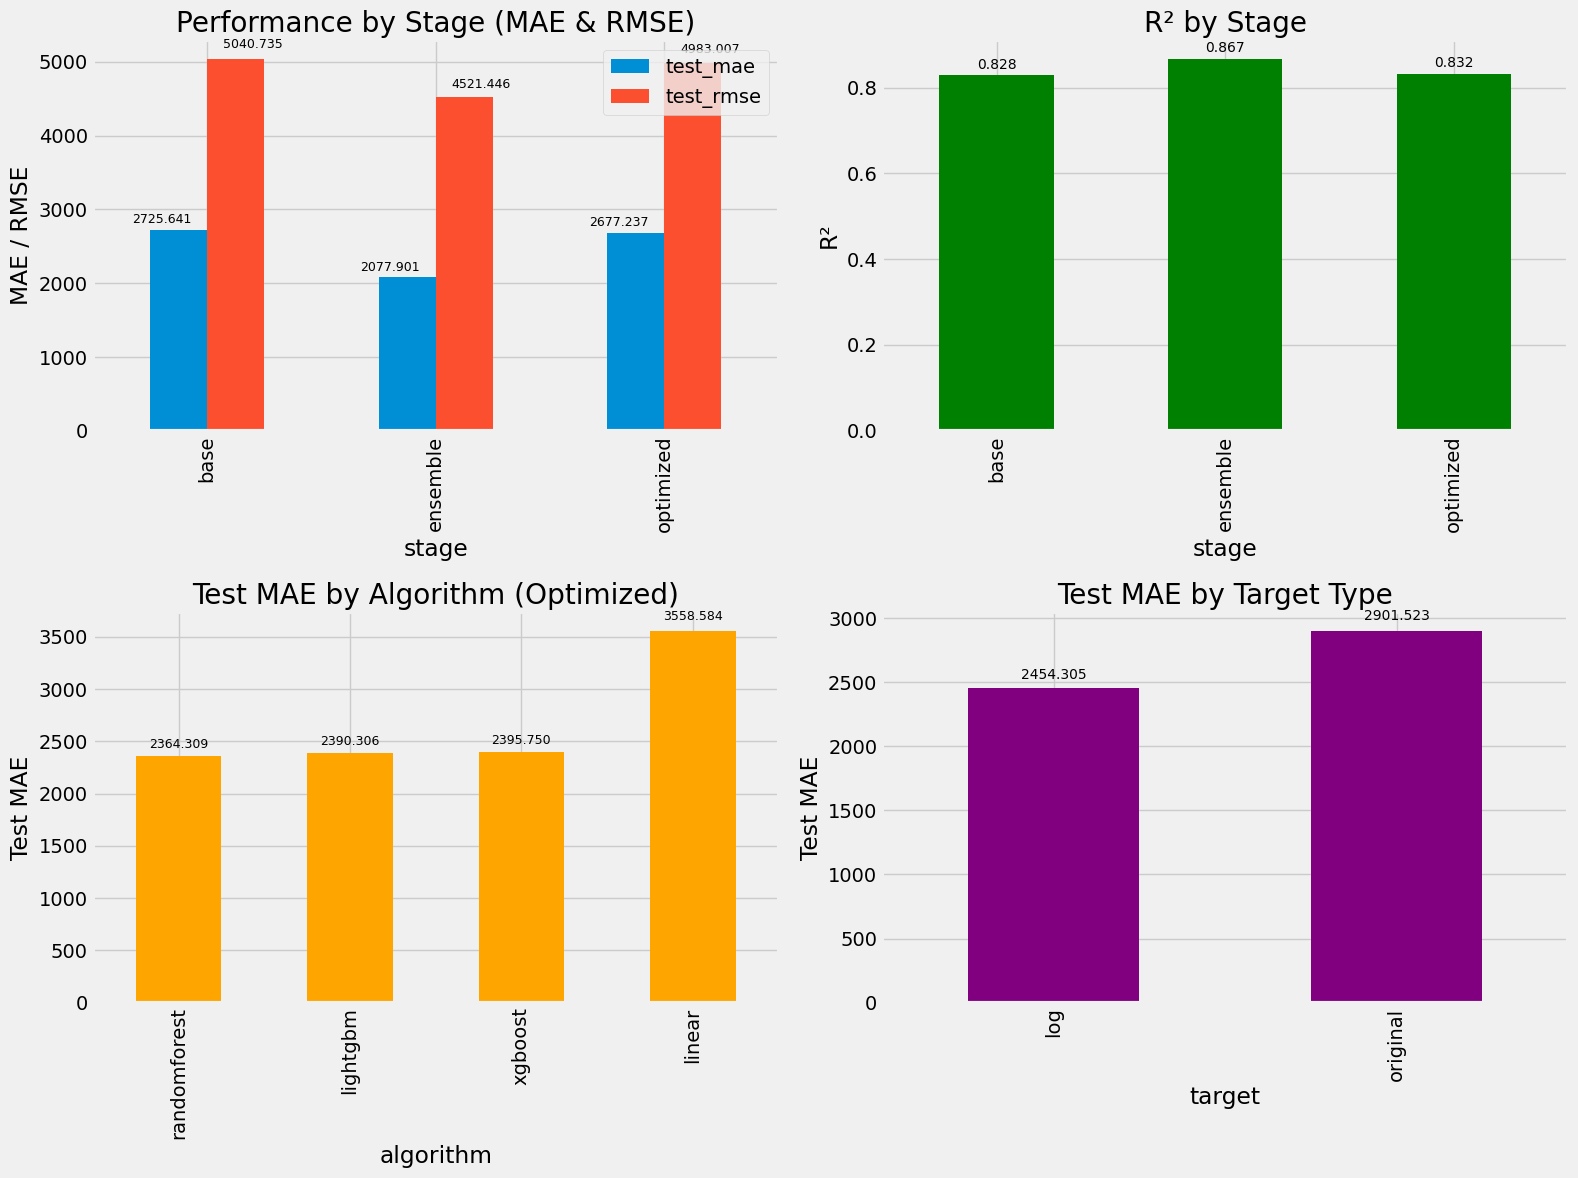


🎯 Pipeline completed! Processed 34 model configurations.
💡 Best improvement with log transform: log target achieved lowest error rates.


In [29]:
# 5. 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Stage별 성능 비교
stage_perf = final_results.groupby('stage')[['test_mae', 'test_rmse', 'test_r2']].mean()

# MAE & RMSE 차트
bars1 = stage_perf[['test_mae', 'test_rmse']].plot(kind='bar', ax=axes[0,0], title='Performance by Stage (MAE & RMSE)')
axes[0,0].set_ylabel('MAE / RMSE')
axes[0,0].legend()

# MAE & RMSE 값 표시
for i, stage in enumerate(stage_perf.index):
    mae_val = stage_perf.loc[stage, 'test_mae']
    rmse_val = stage_perf.loc[stage, 'test_rmse']
    axes[0,0].text(i-0.2, mae_val + mae_val*0.02, f'{mae_val:.3f}', ha='center', va='bottom', fontsize=9)
    axes[0,0].text(i+0.2, rmse_val + rmse_val*0.02, f'{rmse_val:.3f}', ha='center', va='bottom', fontsize=9)

# R² 차트
bars2 = stage_perf['test_r2'].plot(kind='bar', ax=axes[0,1], title='R² by Stage', color='green')
axes[0,1].set_ylabel('R²')

# R² 값 표시
for i, (stage, r2_val) in enumerate(stage_perf['test_r2'].items()):
    axes[0,1].text(i, r2_val + r2_val*0.01, f'{r2_val:.3f}', ha='center', va='bottom', fontsize=10)

# 알고리즘별 성능 (최적화 단계)
if len(optimized_results_df) > 0:
    algo_perf = optimized_results_df.groupby('algorithm')['test_mae'].mean().sort_values()
    bars3 = algo_perf.plot(kind='bar', ax=axes[1,0], title='Test MAE by Algorithm (Optimized)', color='orange')
    axes[1,0].set_ylabel('Test MAE')
    
    # 알고리즘별 MAE 값 표시
    for i, (algo, mae_val) in enumerate(algo_perf.items()):
        axes[1,0].text(i, mae_val + mae_val*0.02, f'{mae_val:.3f}', ha='center', va='bottom', fontsize=9, rotation=0)

# 타겟 타입별 성능
if len(final_results[final_results['target'].notna()]) > 0:
    target_perf = final_results[final_results['target'].notna()].groupby('target')['test_mae'].mean()
    bars4 = target_perf.plot(kind='bar', ax=axes[1,1], title='Test MAE by Target Type', color='purple')
    axes[1,1].set_ylabel('Test MAE')
    
    # 타겟별 MAE 값 표시
    for i, (target, mae_val) in enumerate(target_perf.items()):
        axes[1,1].text(i, mae_val + mae_val*0.02, f'{mae_val:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n🎯 Pipeline completed! Processed {len(final_results)} model configurations.")
print(f"💡 Best improvement with log transform: {best_target_type} target achieved lowest error rates.")

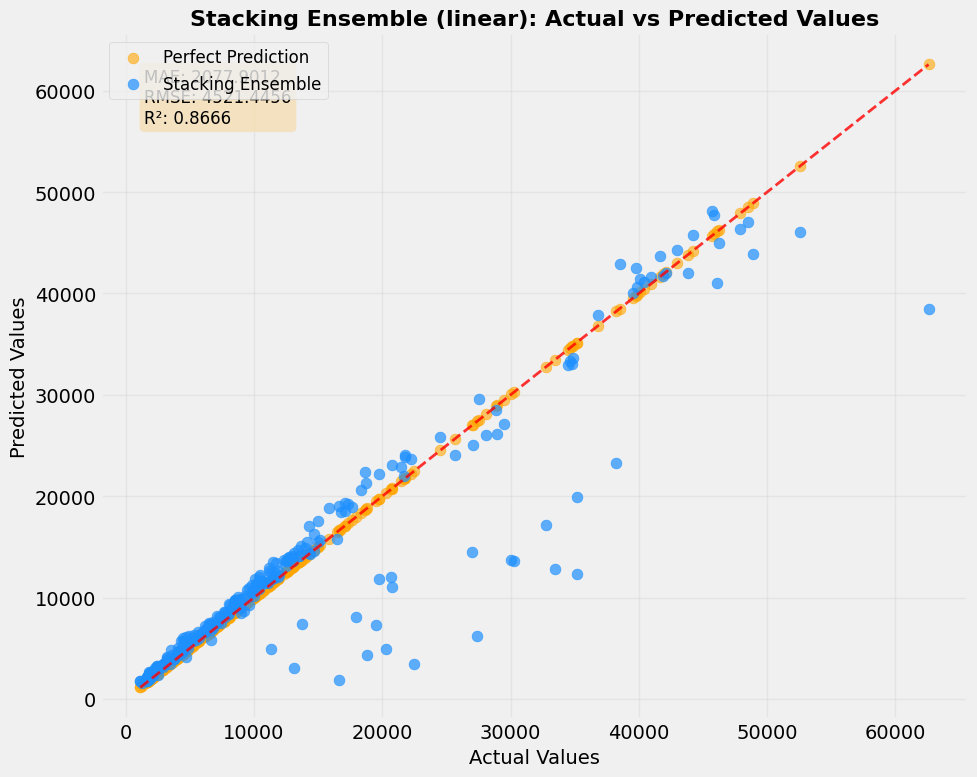


✅ Pipeline completed successfully!

Summary:
- Trained 16 base models
- Optimized 16 models with Optuna
- Created stacking ensemble with 5-fold CV
- Best target type: log
- Best ensemble meta model: linear
- Best single model MAE: 2105.0319
- Stacking ensemble MAE: 2077.9012
- Stacking ensemble RMSE: 4521.4456
- Stacking ensemble R²: 0.8666


In [30]:
# =====================================================================
# 5. 스태킹 모델 예측값 vs 실제값 산포도
# =====================================================================
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test, alpha=0.6, color='orange', label='Perfect Prediction', s=60)
plt.scatter(y_test, final_pred, alpha=0.7, color='dodgerblue', label='Stacking Ensemble', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, alpha=0.8)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title(f'Stacking Ensemble ({best_ensemble_result["meta_name"]}): Actual vs Predicted Values', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# 성능 지표를 그래프에 추가
textstr = f'MAE: {ensemble_mae}\nRMSE: {ensemble_rmse}\nR²: {ensemble_r2}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)
plt.tight_layout()
plt.show()

print("\n✅ Pipeline completed successfully!")
print("\nSummary:")
print(f"- Trained {len(base_results_df)} base models")
print(f"- Optimized {len(optimized_results_df)} models with Optuna")
print(f"- Created stacking ensemble with 5-fold CV")
print(f"- Best target type: {best_target_type}")
print(f"- Best ensemble meta model: {best_ensemble_result['meta_name']}")
print(f"- Best single model MAE: {all_results[all_results['stage'] != 'ensemble']['test_mae'].min()}")
print(f"- Stacking ensemble MAE: {ensemble_mae}")
print(f"- Stacking ensemble RMSE: {ensemble_rmse}")
print(f"- Stacking ensemble R²: {ensemble_r2}")

# 전체 결과 통합
final_results = pd.concat([base_results_df, optimized_results_df, ensemble_results_df], ignore_index=True)